<a id='main'></a>

### Data & Folders
[Data &  Folders](#data_folders)

### Scenarios covered:
[List of scenarios](#scenes)

### Functions
[functions](#functions)

### Plots:
[plots](#plots)

In [1]:
import os
os.chdir('../') # important if this notebook is not in main but in notebooks folder

import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from functools import partial

%matplotlib inline

defaultCmap = cm.get_cmap('Set2')
red_pur_Cmap = cm.get_cmap('PuRd')
reds_Cmap = cm.get_cmap('Reds')

#confi_z_dict = { 99 : 2.576, 
#                 98 : 2.326,
#                 95 : 1.96,
#                 90 : 1.645,}
#ci = z*sigma/sqrt(n)

<a id='data_folders'></a>
### Data &  Folders 
[back to top](#main)

In [44]:
server_data_folder_str = '/home/rafael/Documents/PhD/Academia/Corona_Model_plotting/'
output_folder = '/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/'
scenarios_list = os.listdir(server_data_folder_str)

for i in scenarios_list: 
    if i.endswith(".pptx"):
        scenarios_list.remove(i)
    
scenarios_list.sort()
print(len(scenarios_list))
scenarios_list


46


['.ipynb_checkpoints',
 'additional_locations',
 'base_scenario',
 'close_all_336',
 'close_public_home_office_scan_0.2_0.9',
 'close_public_inf_0.15',
 'disobedience_scan_0.00_0.45',
 'incidence_scan_LockDownLight',
 'incidence_scan_LockDownLight_2',
 'incidence_scan_control',
 'incidence_scan_control_2',
 'infect_agents_between_age_20_24',
 'infectivity_scan_0.025_0.500',
 'infectivity_scan_0.05_0.50',
 'lockdown_start_scan_100_550',
 'mix_base_scenario',
 'mix_product_0.6',
 'modified_interaction_frequencies_Bad_Feilnbach',
 'modified_interaction_frequencies_Gangelt',
 'no_infections',
 'no_infections_mix',
 'product_0.6_scan_inf_0.075_1.200',
 'recover_age_scan_0.1_0.9',
 'recover_age_scan_0.5_0.9',
 'recover_from_world_scan_0.5_0.9',
 'recover_from_world_scan_0.5_0.9_old',
 'recover_household_scan_0.5_0.9',
 'recover_household_scan_0.5_0.9_old',
 'recover_interaction_scan_0.5_0.9',
 'recover_interaction_scan_0.5_0.9_old',
 'recover_mix1_scan_0.5_0.9',
 'recover_ordered1_0.5_0.9',


<a id='scenes'></a>
### List of Scenarios covered by the notebook: 
[back to top](#main)

In [43]:
## adapt scenarios list to contain NO scaned scenarios
scans_per_scene_dict = {}
for scene in scenarios_list:
    working_dir = server_data_folder_str + scene + '/'
    scans_list = os.listdir(working_dir)
    scans_list = [x for x in scans_list if '.pptx' not in x and 'plots' not in x]
    scans_per_scene_dict[scene] = scans_list

scenarios_list1 = [x for x in scenarios_list if len(scans_per_scene_dict[x]) == 1 or x == 'base_scenario']

print(len(scenarios_list1))
scenarios_list1

8


['base_scenario',
 'close_all_336',
 'infect_agents_between_age_20_24',
 'mix_base_scenario',
 'no_infections',
 'no_infections_mix',
 'recover_pensioner_infectivity_0.15',
 'school_time_separation']

<a id='functions'></a>
### Functions 
[back to top](#main)

In [59]:
def infections_per_location_type_file_names(server_data_folder_str):
    
    infections_per_location_type_file_list = []
    
    for root,dirs,files in os.walk(server_data_folder_str):
        for file in files:
            if file.endswith("infections_per_location_type.csv"):
                a = root+'/'+str(file)
                infections_per_location_type_file_list.append(a)
    
    return infections_per_location_type_file_list


In [77]:
def plot_infection_per_location(infection_per_location_list,locations, title = True):
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    inf_per_loc_df = pd.read_csv(infection_per_location_list)
    inf_per_loc_df[locations].boxplot(ax=ax)
    plt.ylabel('infections per location type')
    if title:
        plt.title(group_folder)
    
    
    return fig,ax

In [98]:
def subplot_name(group_folder,number_division,number):
    
    name_to_split = scenarios_files_dict[group_folder][number]
    name_splited = name_to_split.split("/")
    name_for_plot = name_splited[8]
    number_splitted = name_for_plot.split("_")[number_division]
    
    return number_splitted

###Dictionary with file names

In [81]:
scenarios_files_dict = {}
for i in scenarios_list:
    files = infections_per_location_type_file_names(server_data_folder_str + i +"/")
    scenarios_files_dict[i] = files

<a id='plots'></a>
# Plots
[back to top](#main)

[Base Line Scenario](#base)

[Close all 336 scenario](#close336)

[Infect agents between age 20 24](#Infectagents)

[Mix base scenario](#Mixbase)

[No infections & No infections mix](#Noinfections)

[Recover pensioner infectivity 0.15s](#Recover)

[School time separation](#school)

<a id='base'></a>
### Base Line Scenario

[back to plot overview](#plots)

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/base_scenario.png


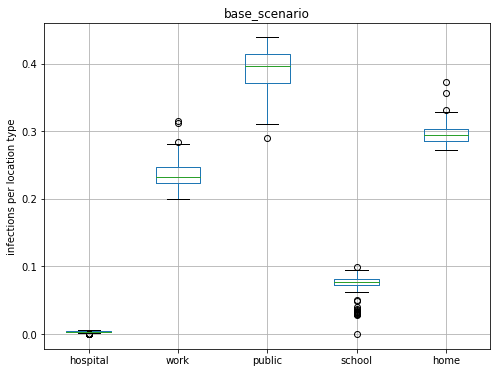

In [82]:
group_folder = 'base_scenario'
file_name = infections_per_location_type_file_names(server_data_folder_str + group_folder +"/")
                
Fig1, ax1 = plot_infection_per_location(file_name[1], locations_to_plot, title = True)
Fig1.savefig(output_folder + group_folder + '.png')

print(output_folder + group_folder + '.png')

<a id='close336'></a>
### Close all 336 scenario

[back to plot overview](#plots)

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/close_all_336.png


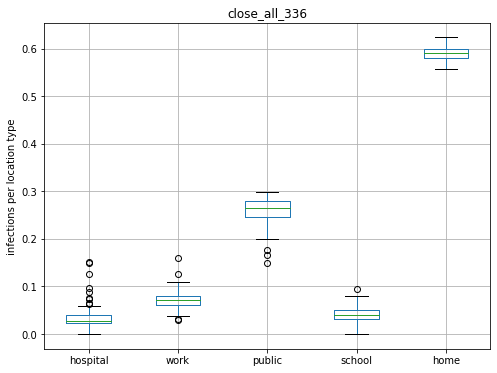

In [83]:
group_folder = 'close_all_336'
file_name = infections_per_location_type_file_names(server_data_folder_str + group_folder +"/")

Fig2, ax2 = plot_infection_per_location(file_name[0],locations_to_plot, title = True)
Fig2.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

<a id='Infectagents'></a>
### Infect agents between age 20 24

[back to plot overview](#plots)

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/infect_agents_between_age_20_24.png


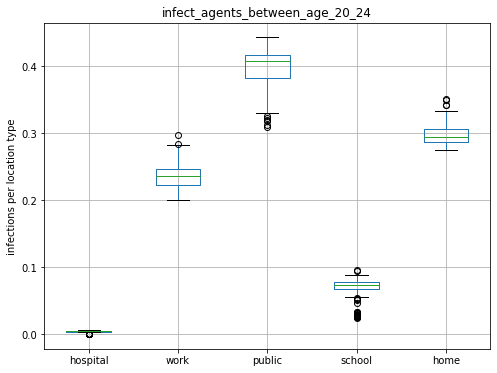

In [84]:
group_folder = 'infect_agents_between_age_20_24'
file_name = infections_per_location_type_file_names(server_data_folder_str + group_folder +"/")
          
Fig3, ax3 = plot_infection_per_location(file_name[0],locations_to_plot, title = True)
Fig3.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

<a id='Mixbase'></a>
### Mix base scenario

[back to plot overview](#plots)

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/mix_base_scenario.png


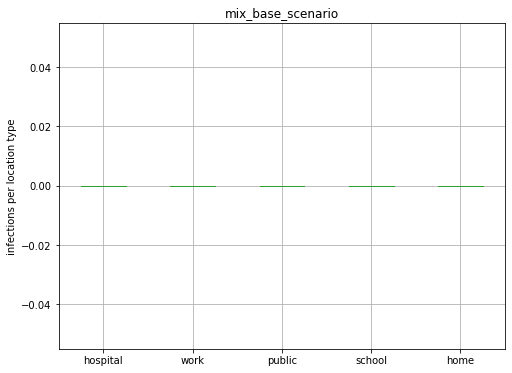

In [85]:
group_folder = 'mix_base_scenario'
file_name = infections_per_location_type_file_names(server_data_folder_str + group_folder +"/")
      
Fig4, ax4 = plot_infection_per_location(file_name[0],locations_to_plot, title = True)
Fig4.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')


<a id='Noinfections'></a>
### No infections & No infections mix

[back to plot overview](#plots)
##### No data for infections

<a id='Recover'></a>
### Recover pensioner infectivity 0.15s

[back to plot overview](#plots)

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/recover_pensioner_infectivity_0.15.png


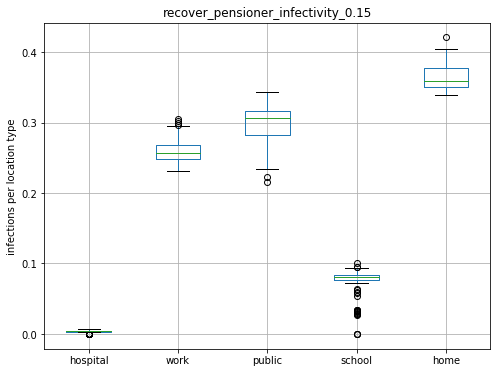

In [86]:
group_folder = 'recover_pensioner_infectivity_0.15'
file_name = infections_per_location_type_file_names(server_data_folder_str + group_folder +"/")

Fig5, ax5 = plot_infection_per_location(file_name[0],locations_to_plot, title = True)
Fig5.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')


<a id='school'></a>
### School time separation

[back to plot overview](#plots)

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/school_time_separation.png


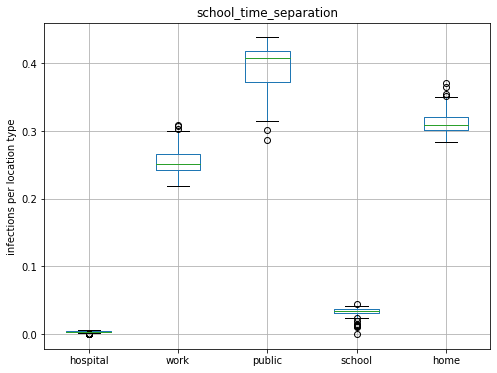

In [87]:
group_folder = 'school_time_separation'
file_name = infections_per_location_type_file_names(server_data_folder_str + group_folder +"/")

Fig6, ax6 = plot_infection_per_location(file_name[0],locations_to_plot, title = True)
Fig6.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')


<a id='scans'></a>
## Scans

[back to plot overview](#plots)

In [88]:
Scan_list = [x for x in scenarios_list if x not in scenarios_list1]

In [52]:
Scan_list

['.ipynb_checkpoints',
 'additional_locations',
 'close_public_home_office_scan_0.2_0.9',
 'close_public_inf_0.15',
 'disobedience_scan_0.00_0.45',
 'incidence_scan_LockDownLight',
 'incidence_scan_LockDownLight_2',
 'incidence_scan_control',
 'incidence_scan_control_2',
 'infectivity_scan_0.025_0.500',
 'infectivity_scan_0.05_0.50',
 'lockdown_start_scan_100_550',
 'mix_product_0.6',
 'modified_interaction_frequencies_Bad_Feilnbach',
 'modified_interaction_frequencies_Gangelt',
 'product_0.6_scan_inf_0.075_1.200',
 'recover_age_scan_0.1_0.9',
 'recover_age_scan_0.5_0.9',
 'recover_from_world_scan_0.5_0.9',
 'recover_from_world_scan_0.5_0.9_old',
 'recover_household_scan_0.5_0.9',
 'recover_household_scan_0.5_0.9_old',
 'recover_interaction_scan_0.5_0.9',
 'recover_interaction_scan_0.5_0.9_old',
 'recover_mix1_scan_0.5_0.9',
 'recover_ordered1_0.5_0.9',
 'recover_ordered1_scan_0.5_0.9',
 'recover_ordered1_scan_0.5_0.9_old',
 'recover_random_scan_0.5_0.9',
 'recover_random_scan_0.5_0.9_

# close_public_home_office_scan_0.2_0.9

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/close_public_home_office_scan_0.2_0.9.png


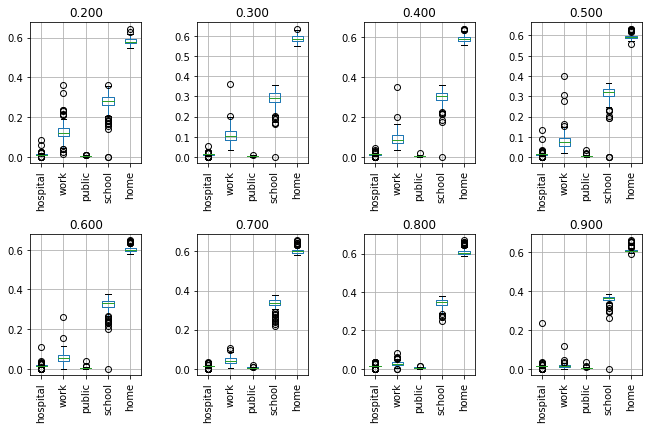

In [102]:
group_folder = 'close_public_home_office_scan_0.2_0.9'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 


fig, axes = plt.subplots(2,4,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)
for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j], labels = subplot_name(group_folder,15,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,15,i))

fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')


# close_public_inf_0.15

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/close_public_inf_0.15.png


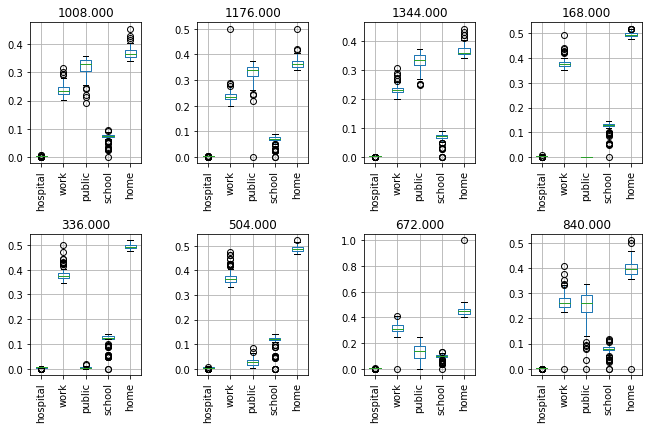

In [104]:
group_folder = 'close_public_inf_0.15'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,4,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,14,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')


# disobedience_scan_0.00_0.45

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/disobedience_scan_0.00_0.45.png


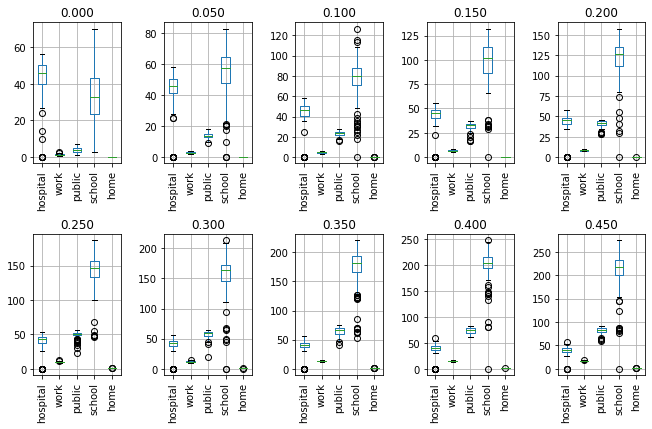

In [110]:
group_folder = 'disobedience_scan_0.00_0.45'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,5,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,10,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# incidence_scan_LockDownLight

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/incidence_scan_LockDownLight.png


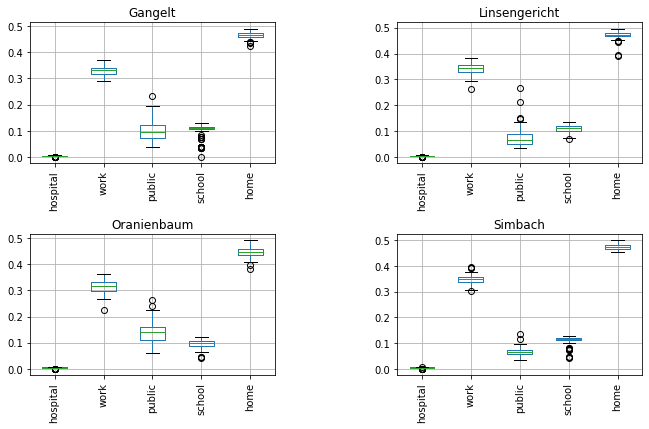

In [120]:
group_folder = 'incidence_scan_LockDownLight'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,0,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# incidence_scan_LockDownLight_2


/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/incidence_scan_LockDownLight_2.png


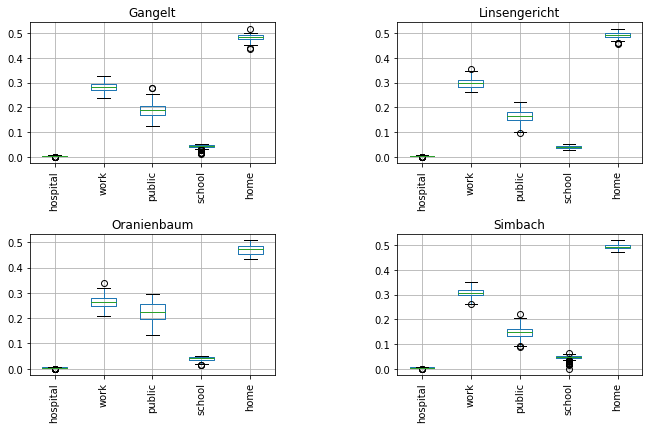

In [121]:
group_folder = 'incidence_scan_LockDownLight_2'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,0,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# incidence_scan_control

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/incidence_scan_control.png


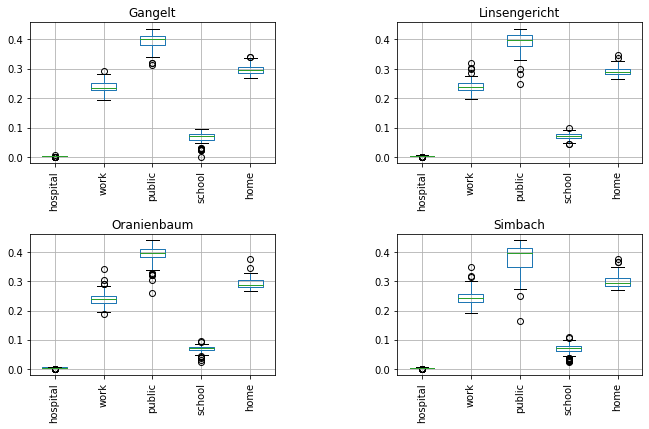

In [122]:
group_folder = 'incidence_scan_control'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,0,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# incidence_scan_control_2

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/incidence_scan_control_2.png


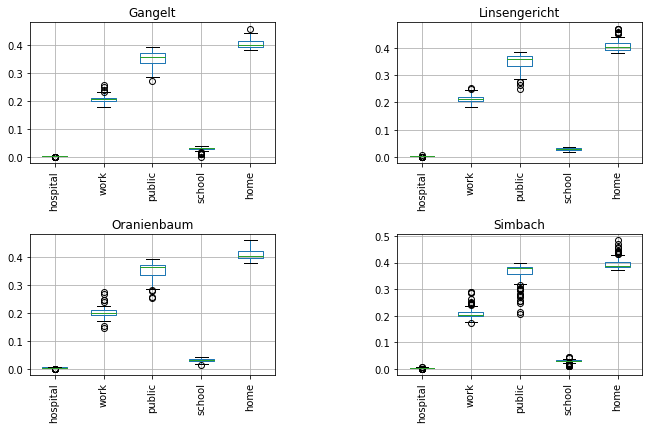

In [123]:
group_folder = 'incidence_scan_control_2'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,0,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# infectivity_scan_0.025_0.500

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/infectivity_scan_0.025_0.500.png


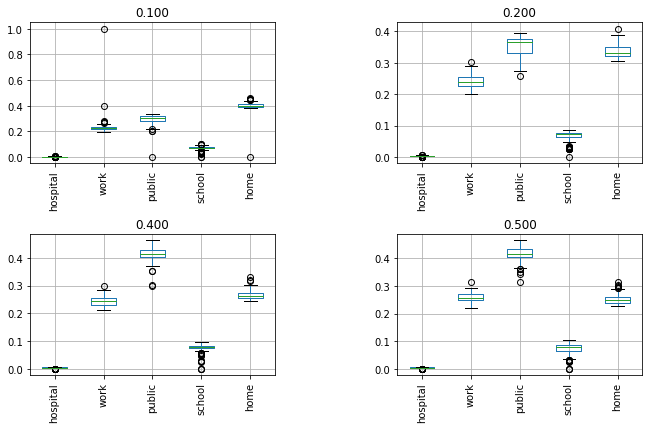

In [130]:
group_folder = 'infectivity_scan_0.025_0.500'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,10,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# infectivity_scan_0.05_0.50

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/infectivity_scan_0.05_0.50.png


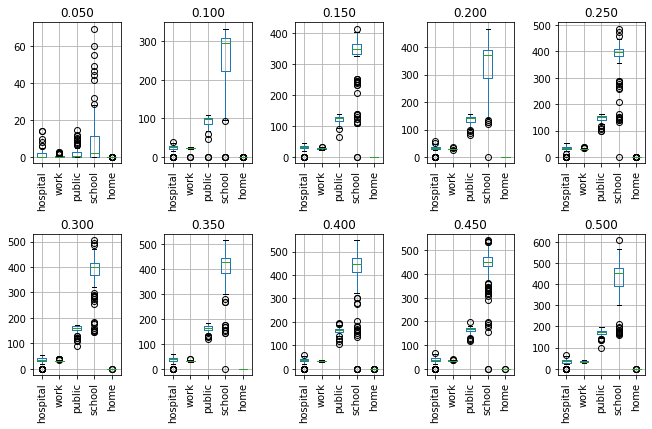

In [142]:
group_folder = 'infectivity_scan_0.05_0.50'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,5,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# lockdown_start_scan_100_550

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/lockdown_start_scan_100_550.png


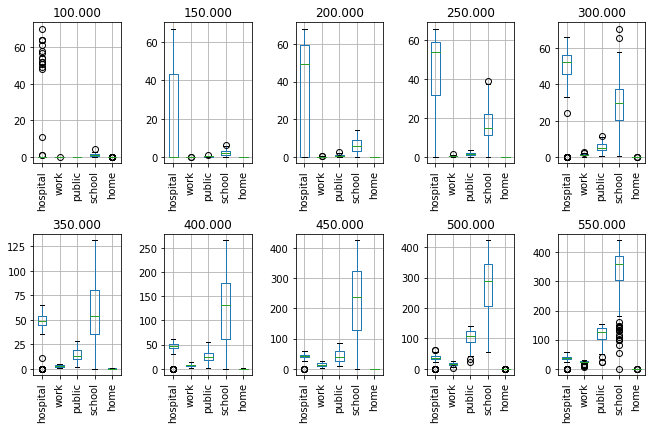

In [143]:
group_folder = 'lockdown_start_scan_100_550'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,5,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# mix_product_0.6

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/mix_product_0.6.png


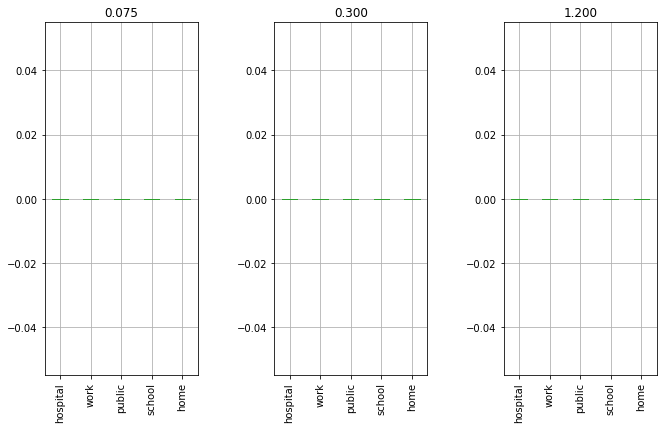

In [148]:
group_folder = 'mix_product_0.6'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(1,3,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,14,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# modified_interaction_frequencies_Bad_Feilnbach

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/modified_interaction_frequencies_Bad_Feilnbach.png


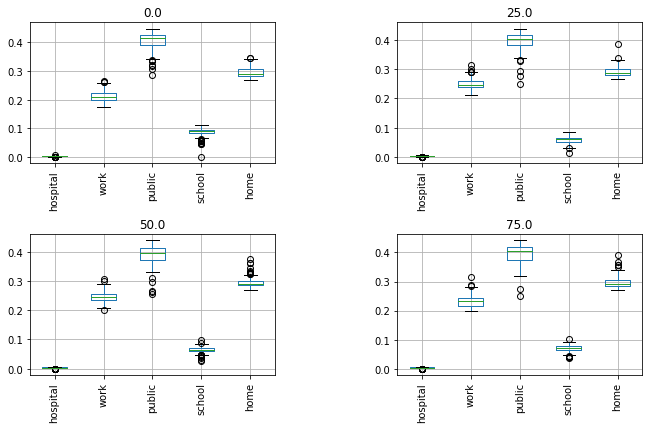

In [161]:
group_folder = 'modified_interaction_frequencies_Bad_Feilnbach'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,2,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# modified_interaction_frequencies_Gangelt

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/modified_interaction_frequencies_Gangelt.png


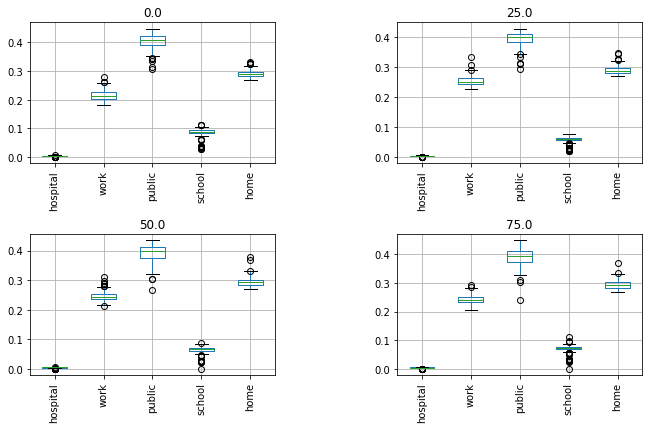

In [162]:
group_folder = 'modified_interaction_frequencies_Gangelt'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,2,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,2,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# product_0.6_scan_inf_0.075_1.200

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/product_0.6_scan_inf_0.075_1.200.png


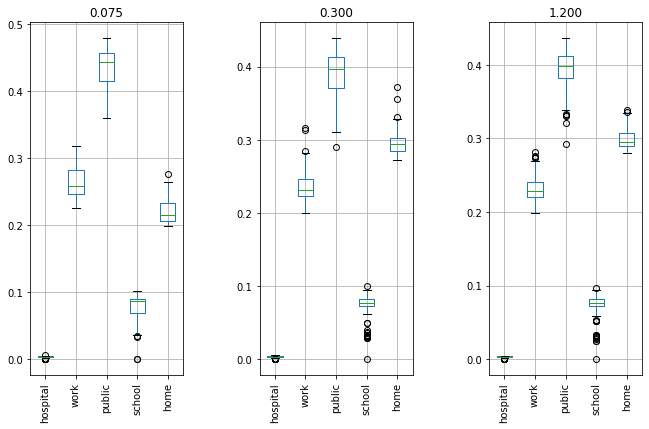

In [169]:
group_folder = 'product_0.6_scan_inf_0.075_1.200'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(1,3,figsize=(10,7))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,13,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_age_scan_0.1_0.9

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/recover_age_scan_0.1_0.9.png


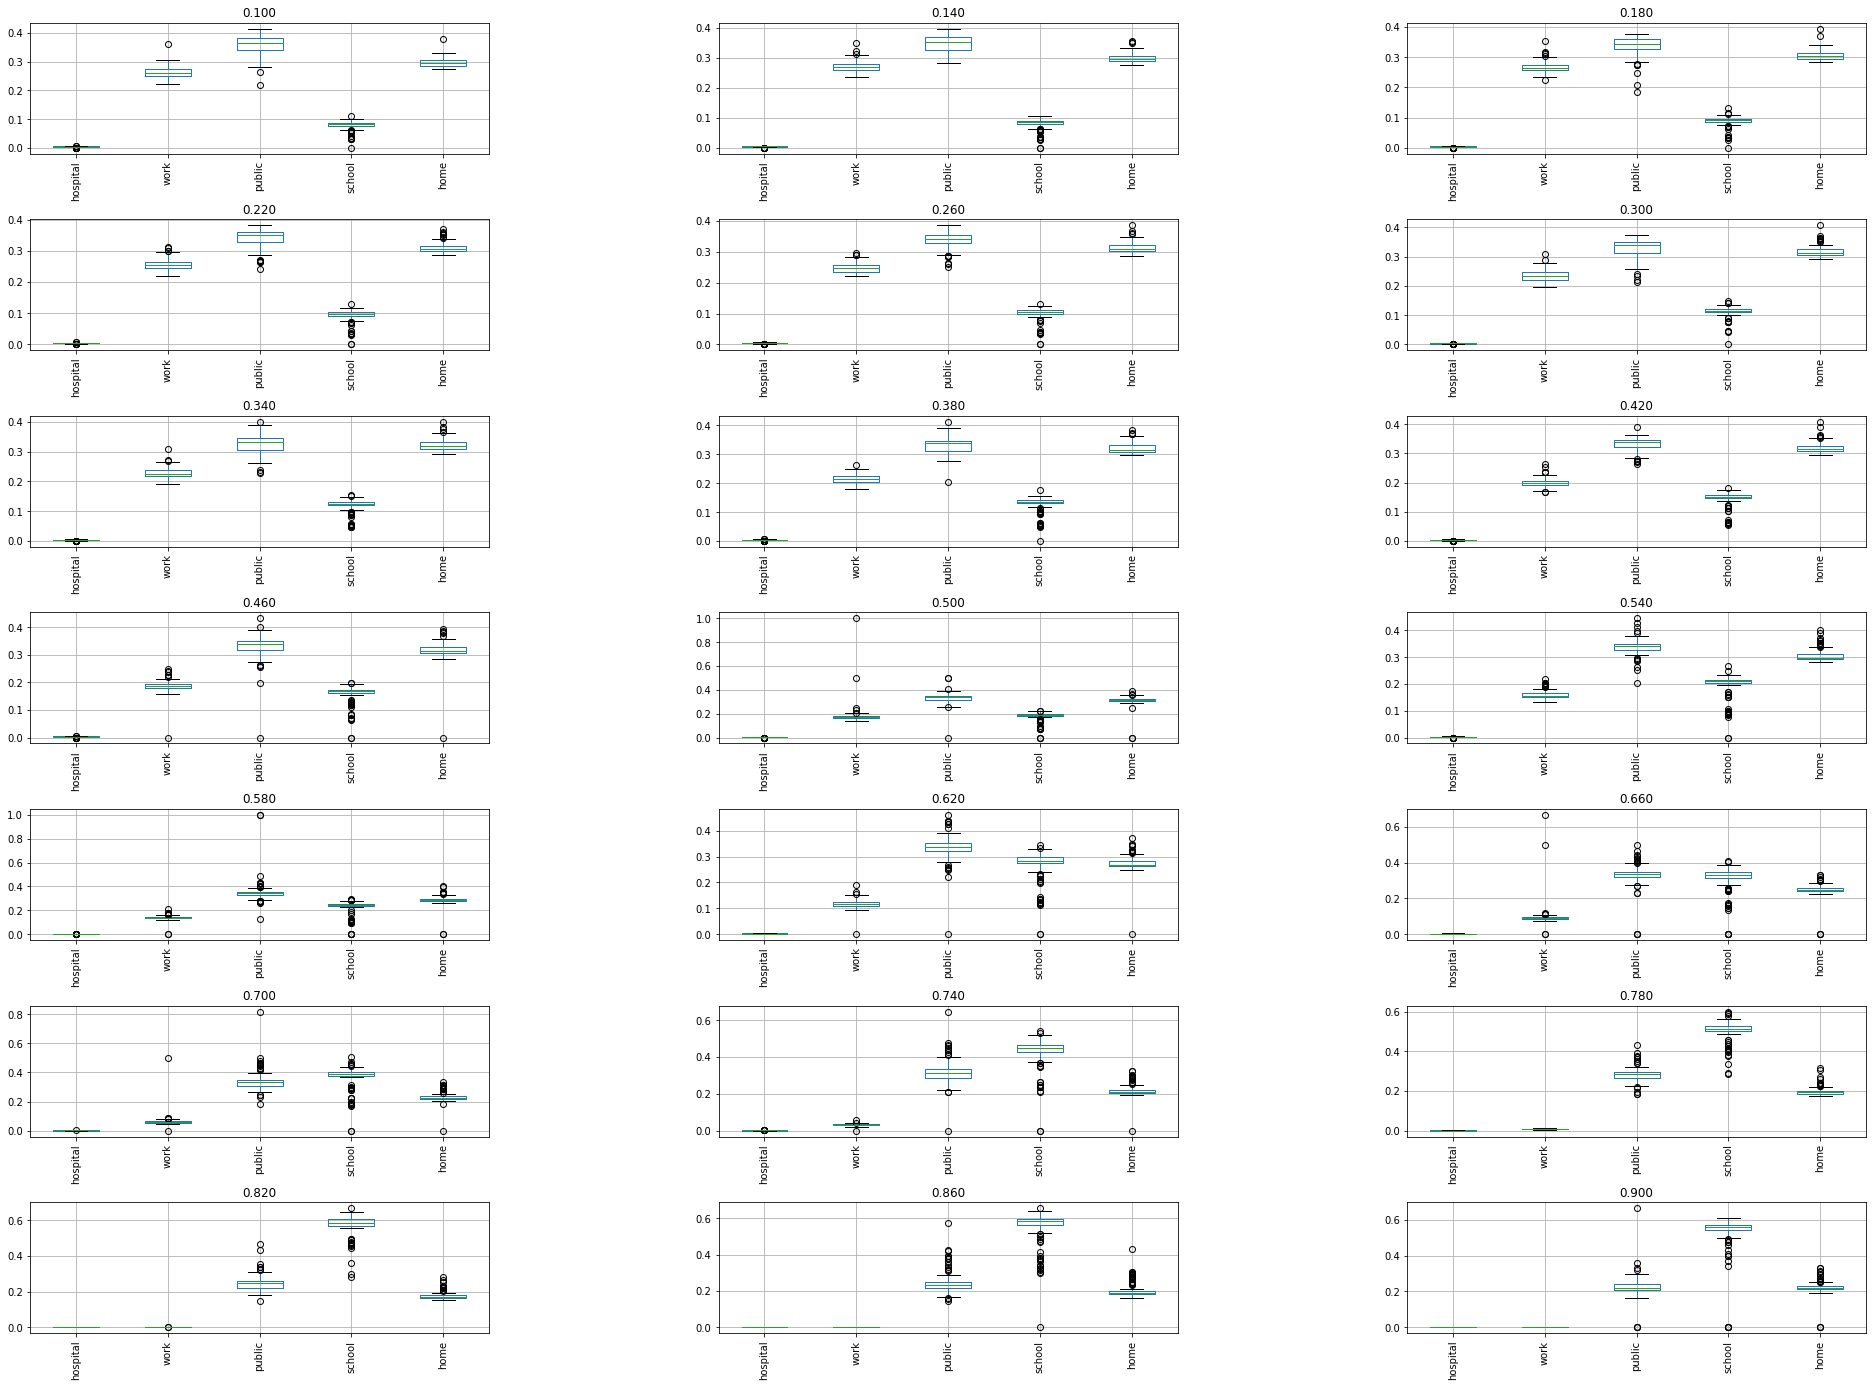

In [180]:
group_folder = 'recover_age_scan_0.1_0.9'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(7,3,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_age_scan_0.5_0.9

IndexError: list index out of range

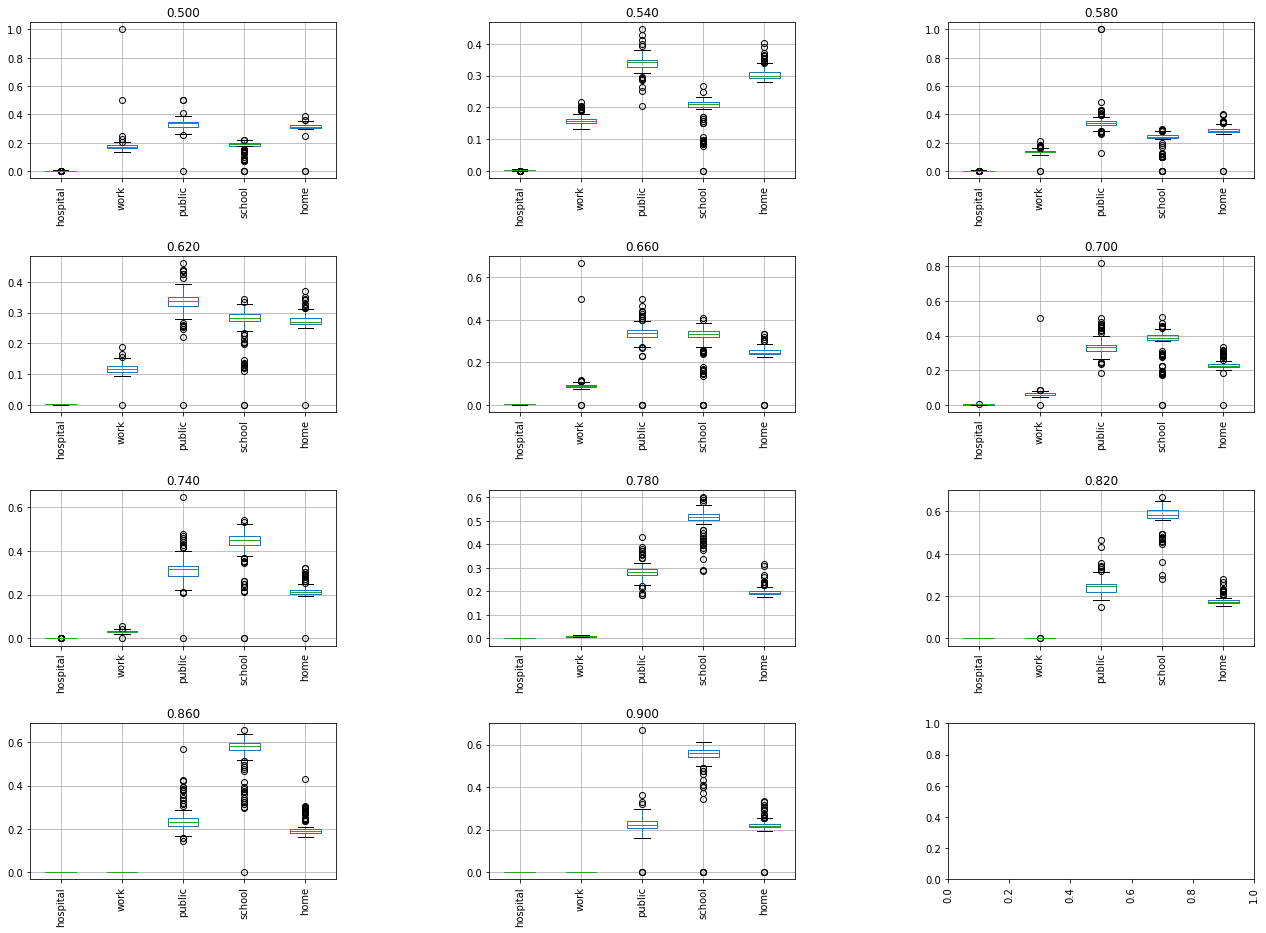

In [181]:
group_folder = 'recover_age_scan_0.5_0.9'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(20,17))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_from_world_scan_0.5_0.9

IndexError: list index out of range

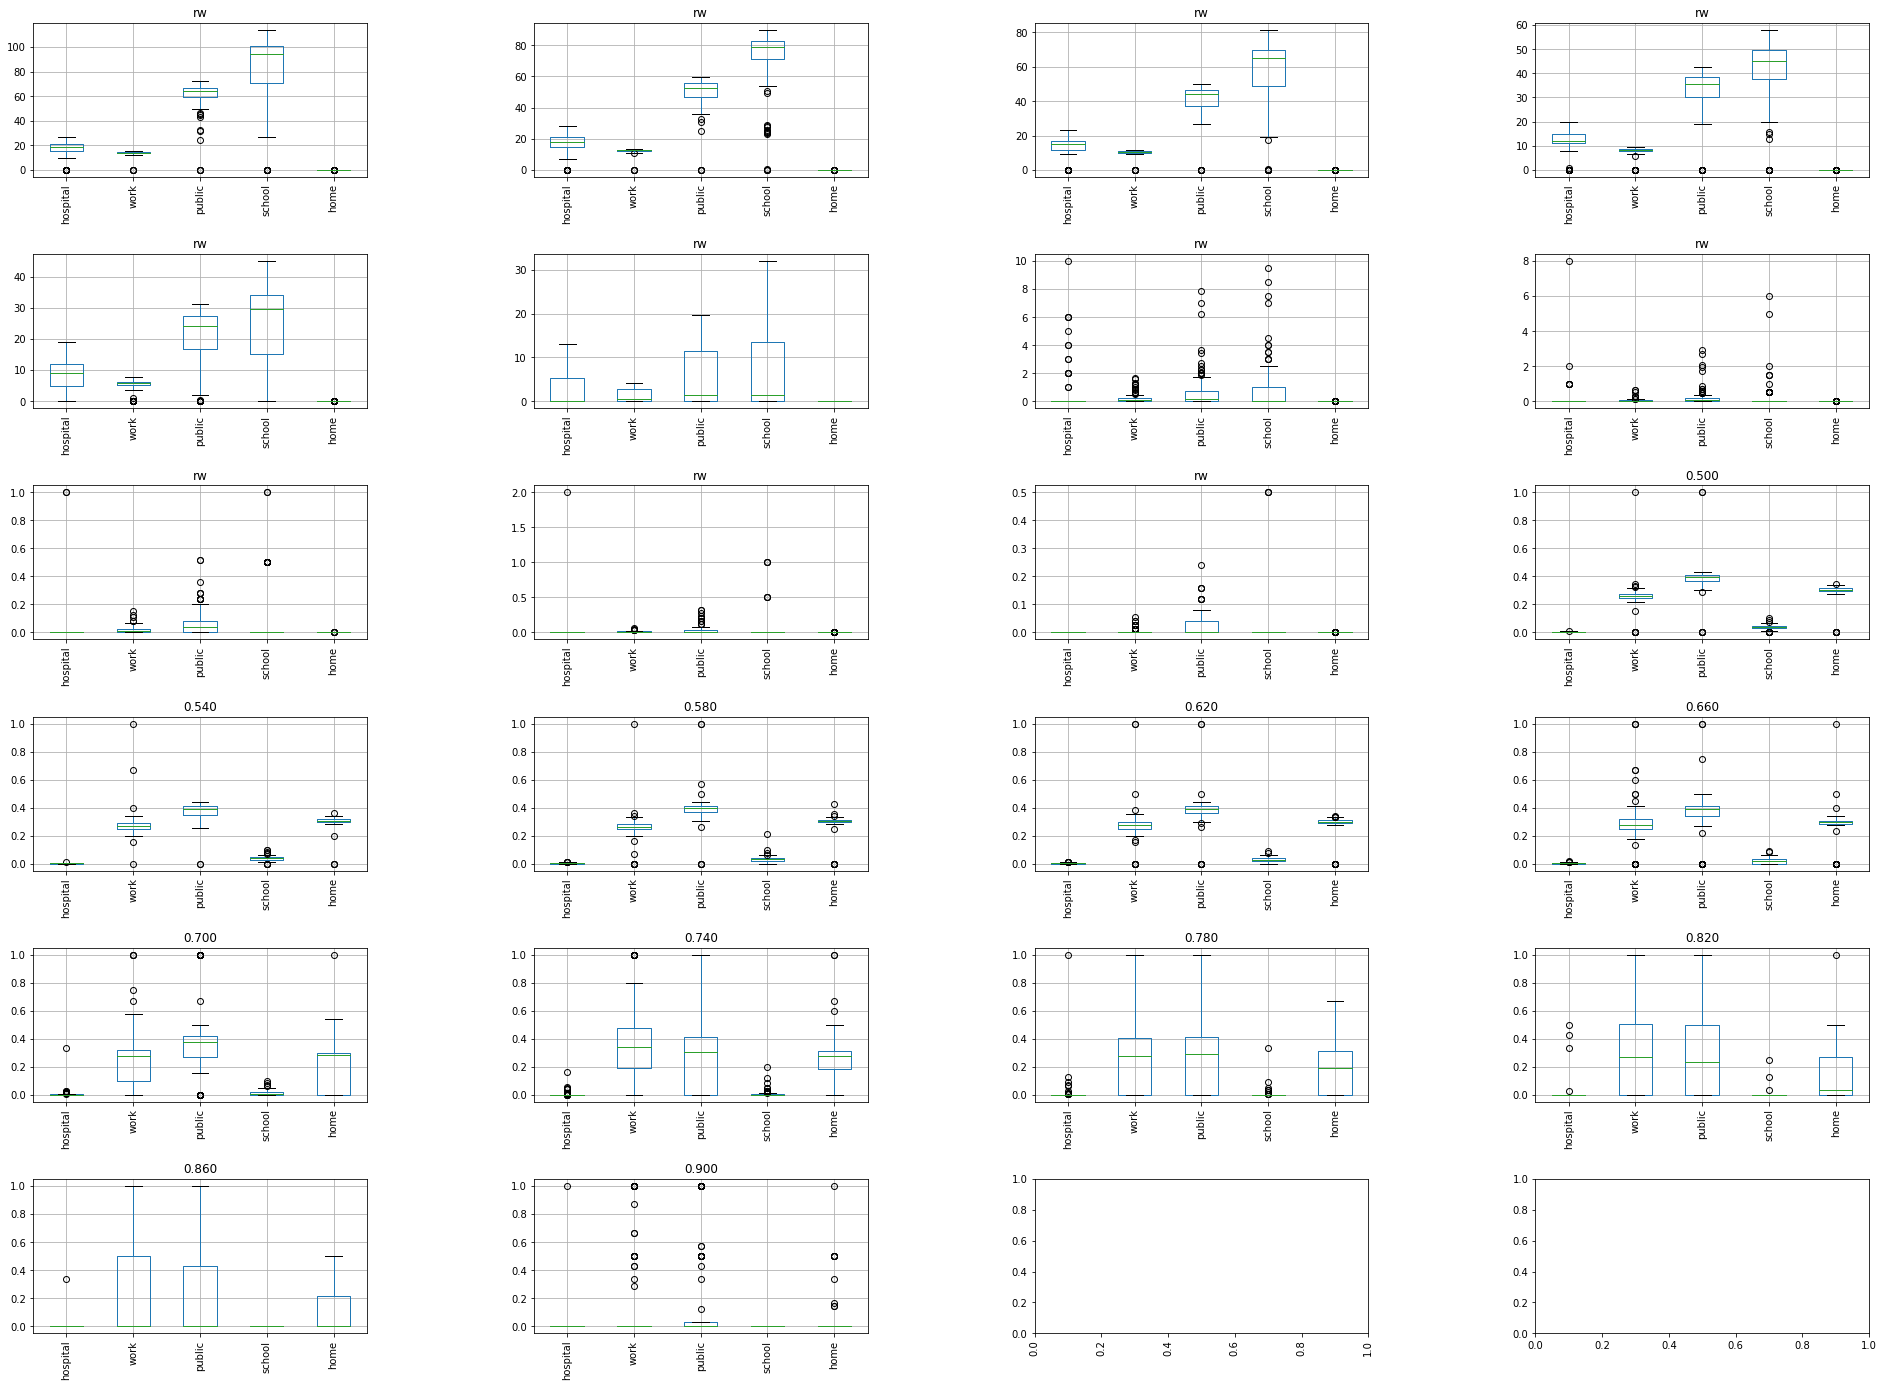

In [182]:
group_folder = 'recover_from_world_scan_0.5_0.9'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(6,4,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_from_world_scan_0.5_0.9_old

IndexError: list index out of range

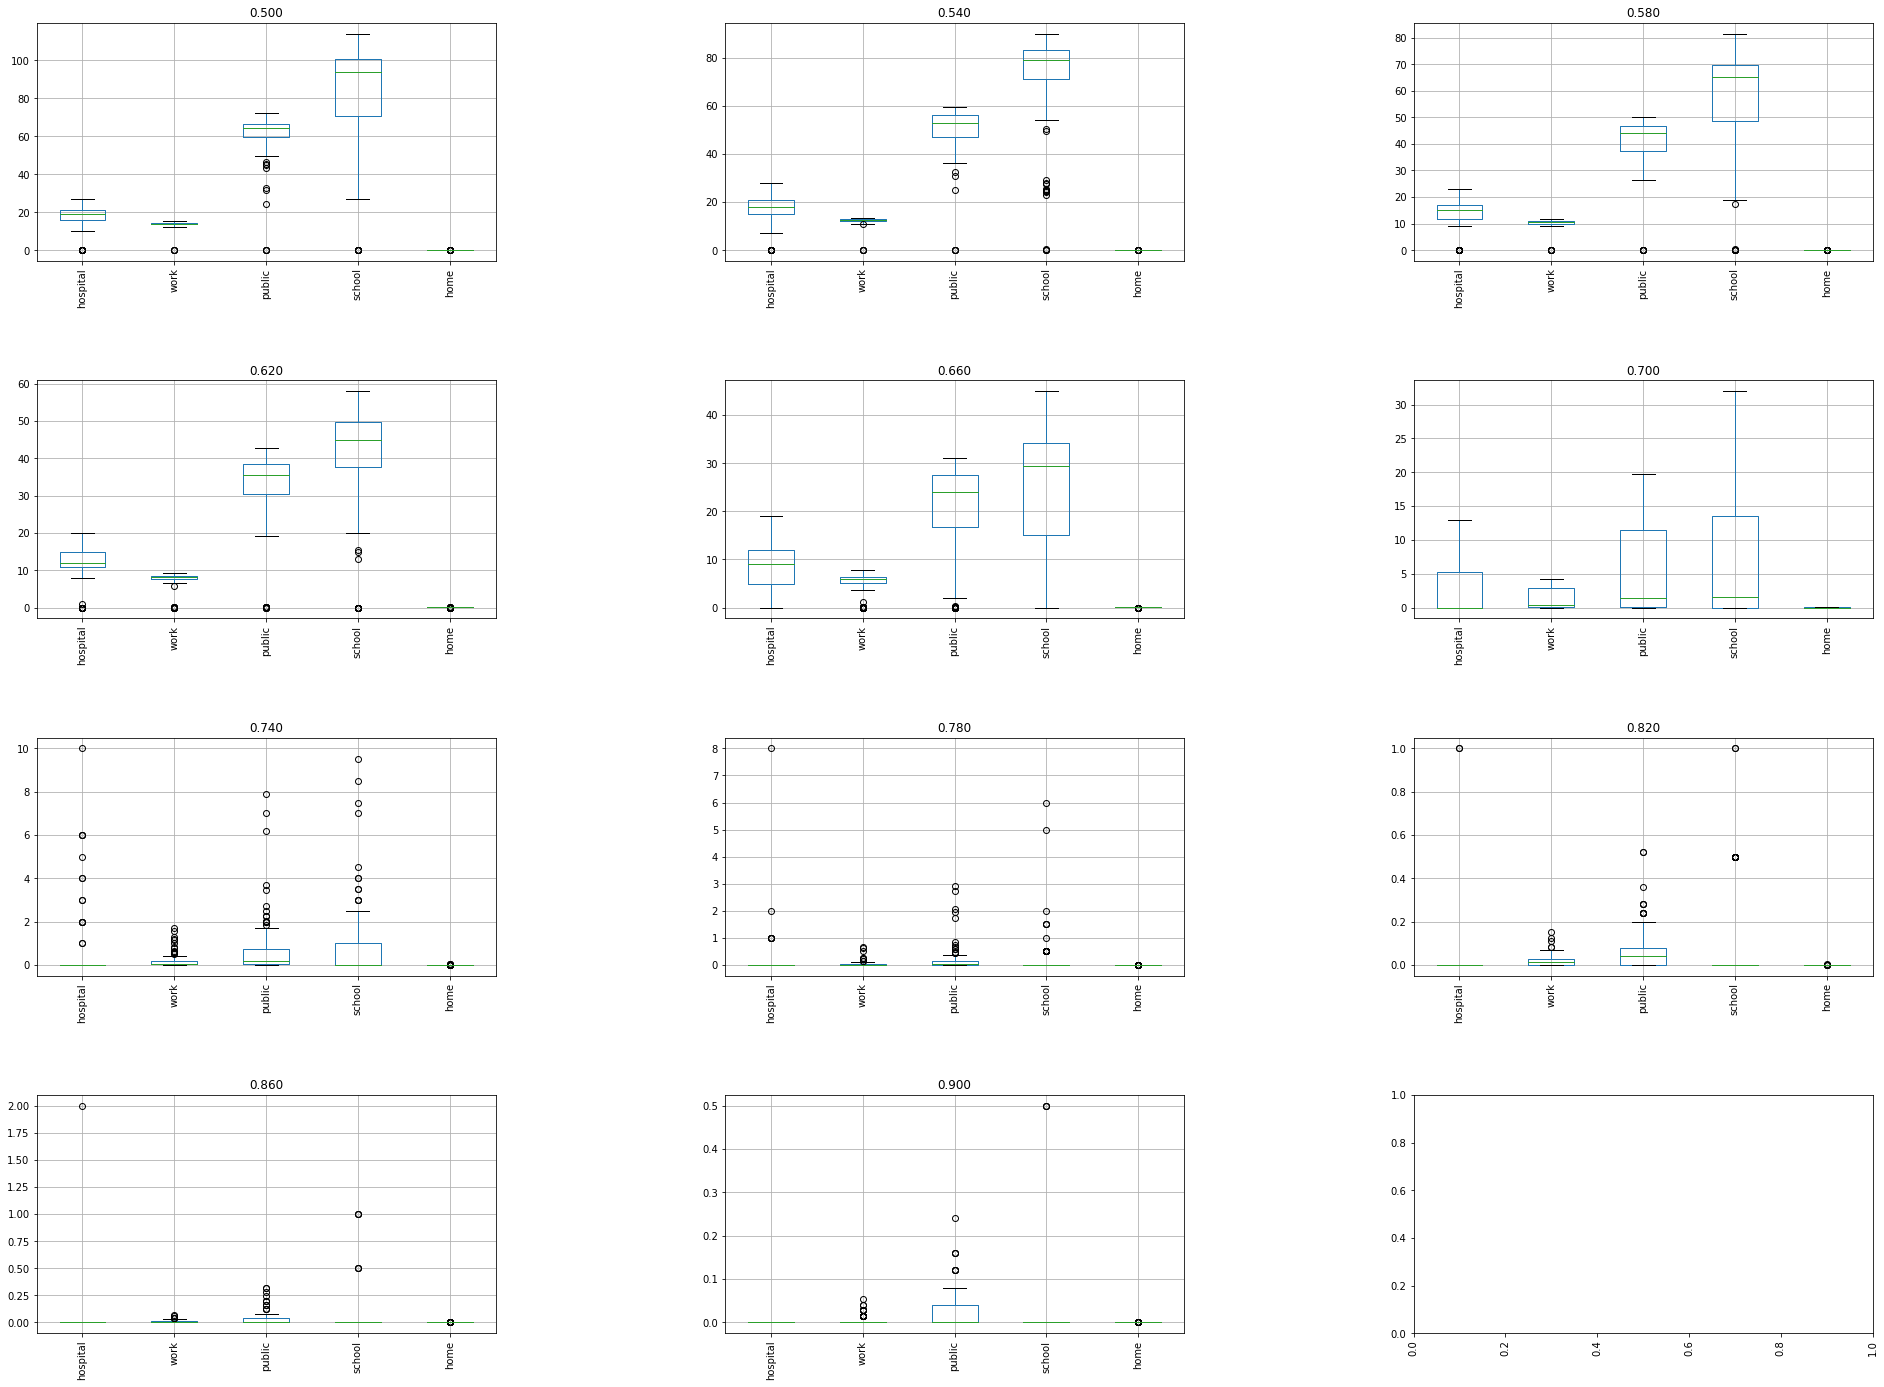

In [188]:
group_folder = 'recover_from_world_scan_0.5_0.9_old'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,11,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_mix1_scan_0.5_0.9

IndexError: list index out of range

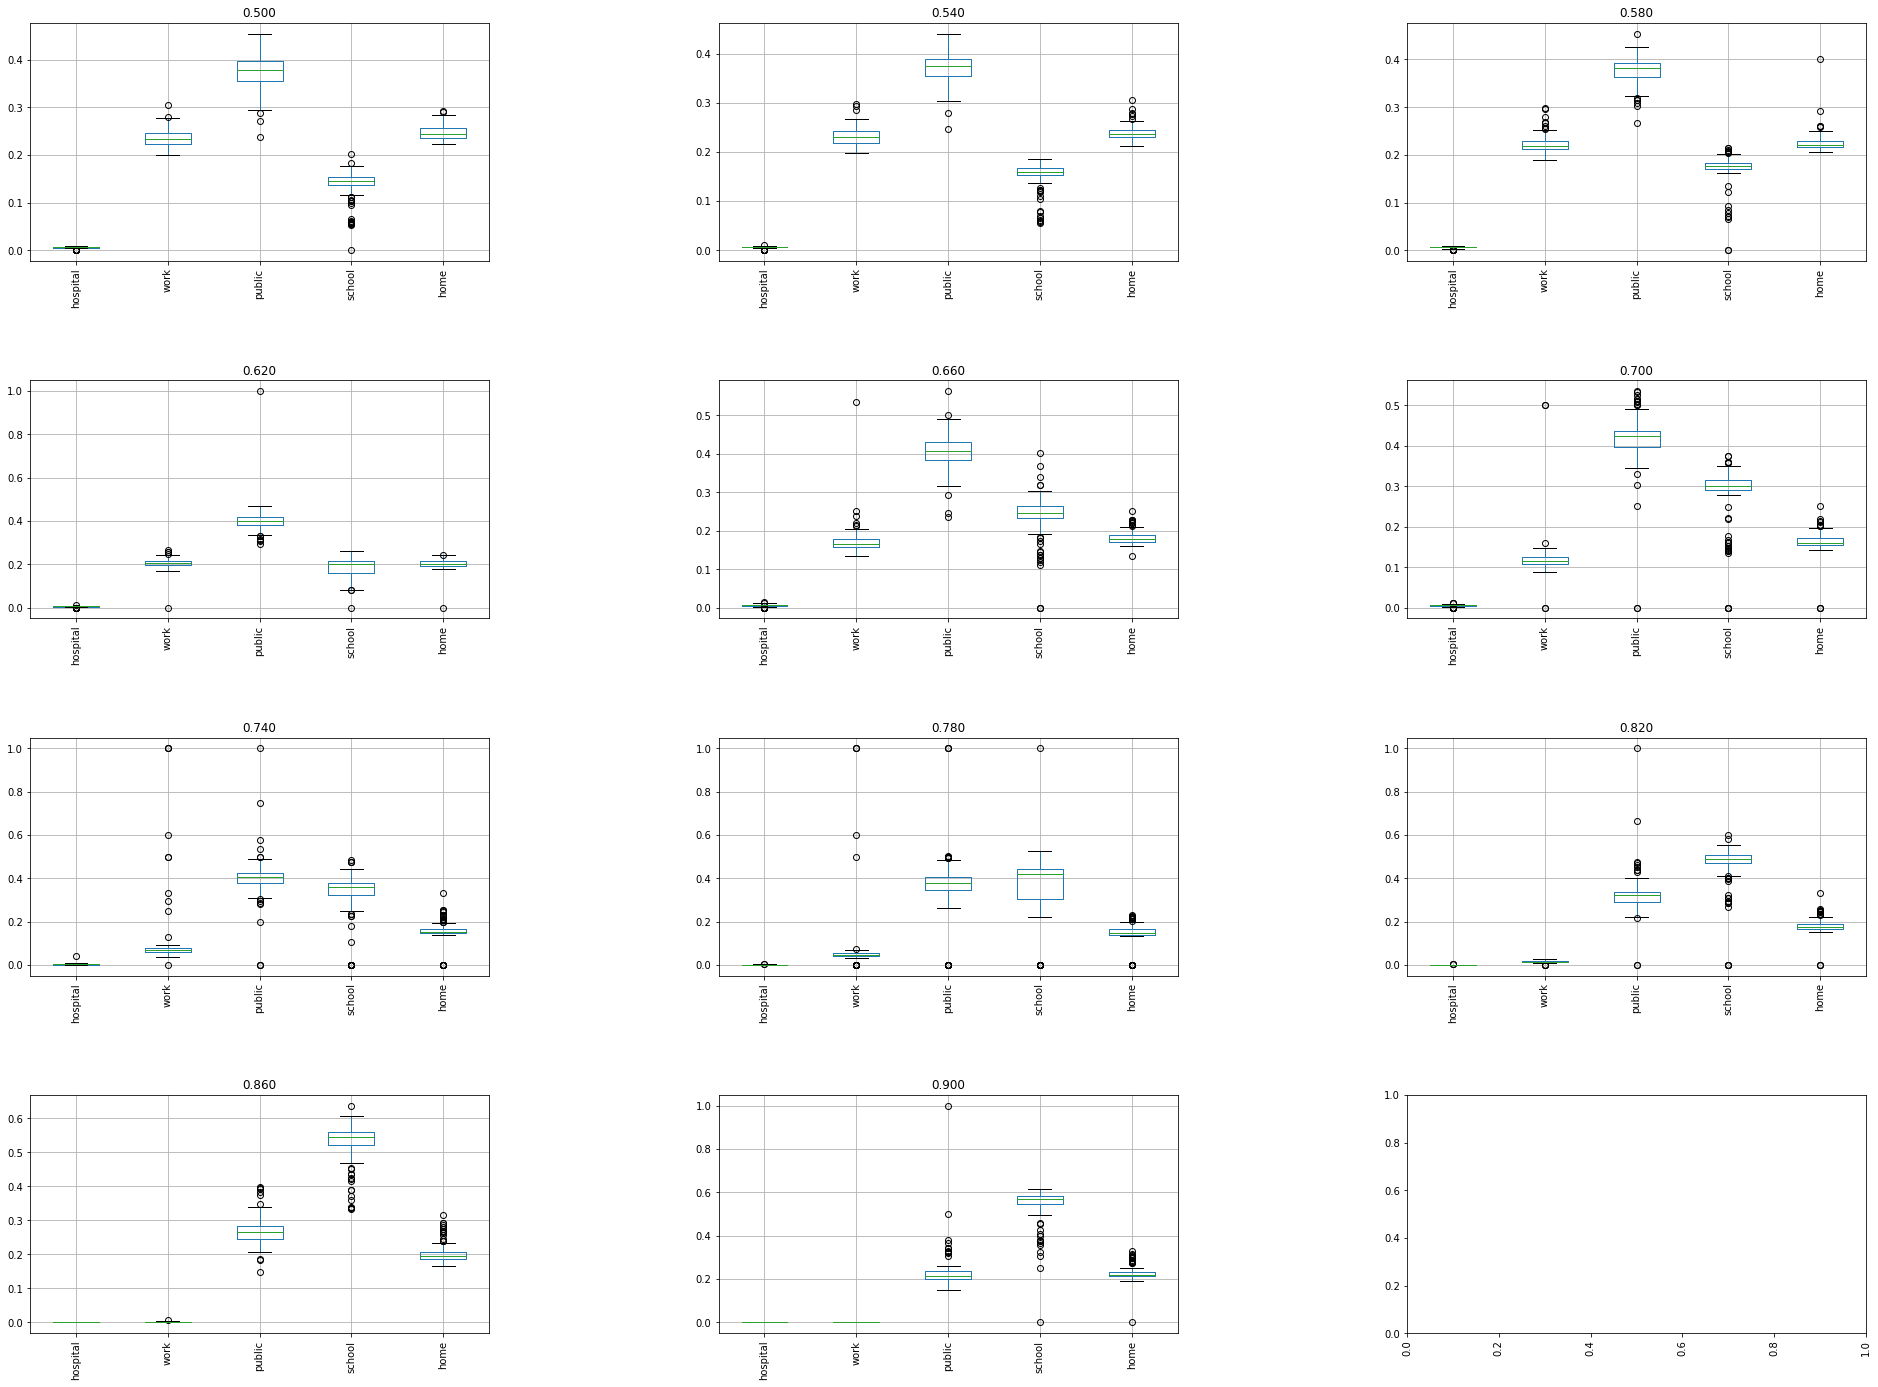

In [190]:
group_folder = 'recover_mix1_scan_0.5_0.9'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_ordered1_0.5_0.9

IndexError: list index out of range

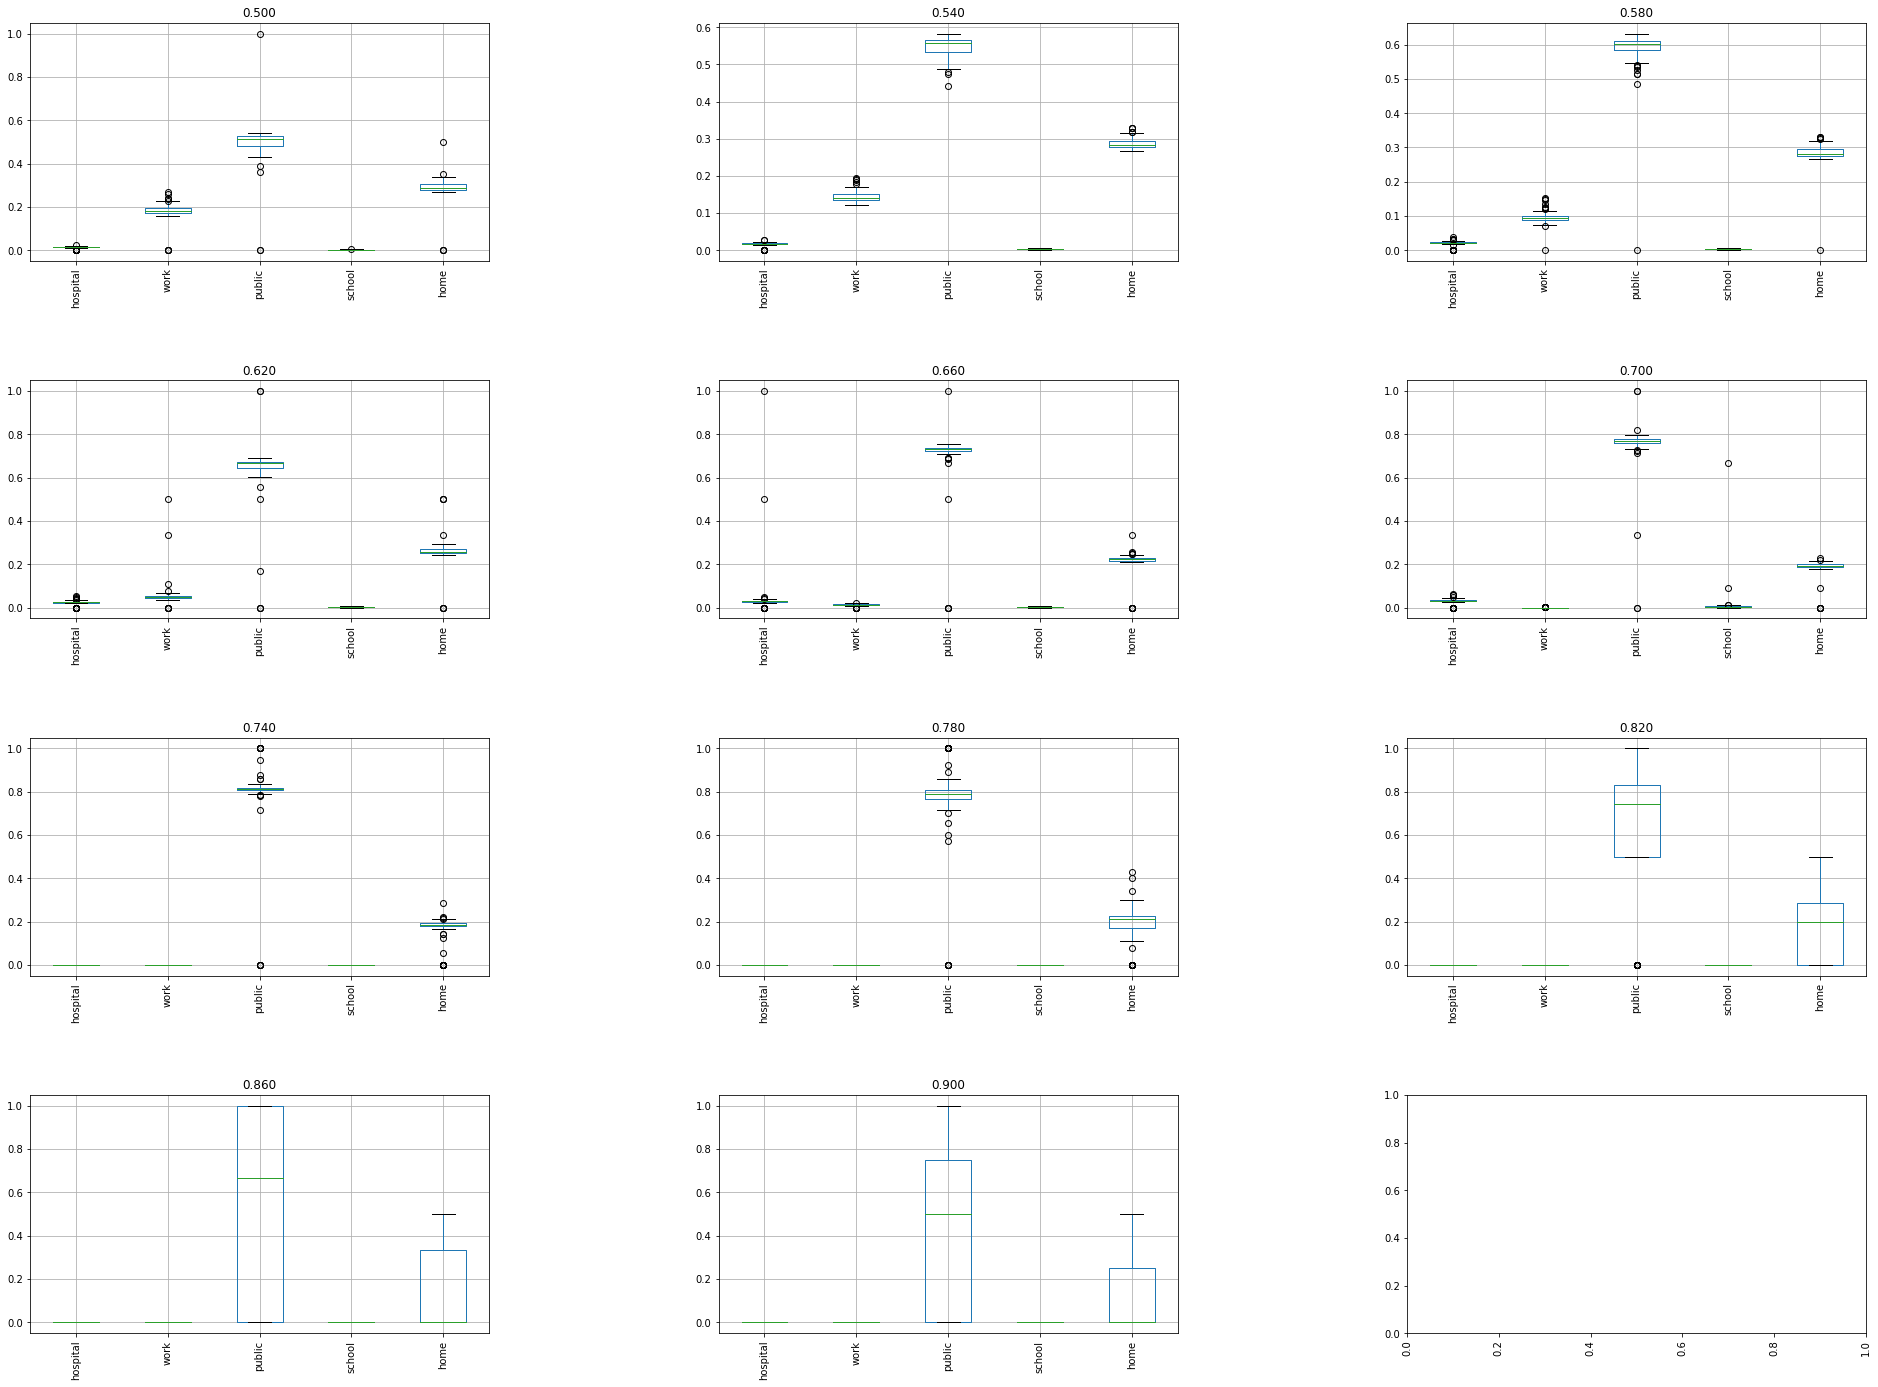

In [194]:
group_folder = 'recover_ordered1_0.5_0.9'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,13,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_ordered1_scan_0.5_0.9

IndexError: list index out of range

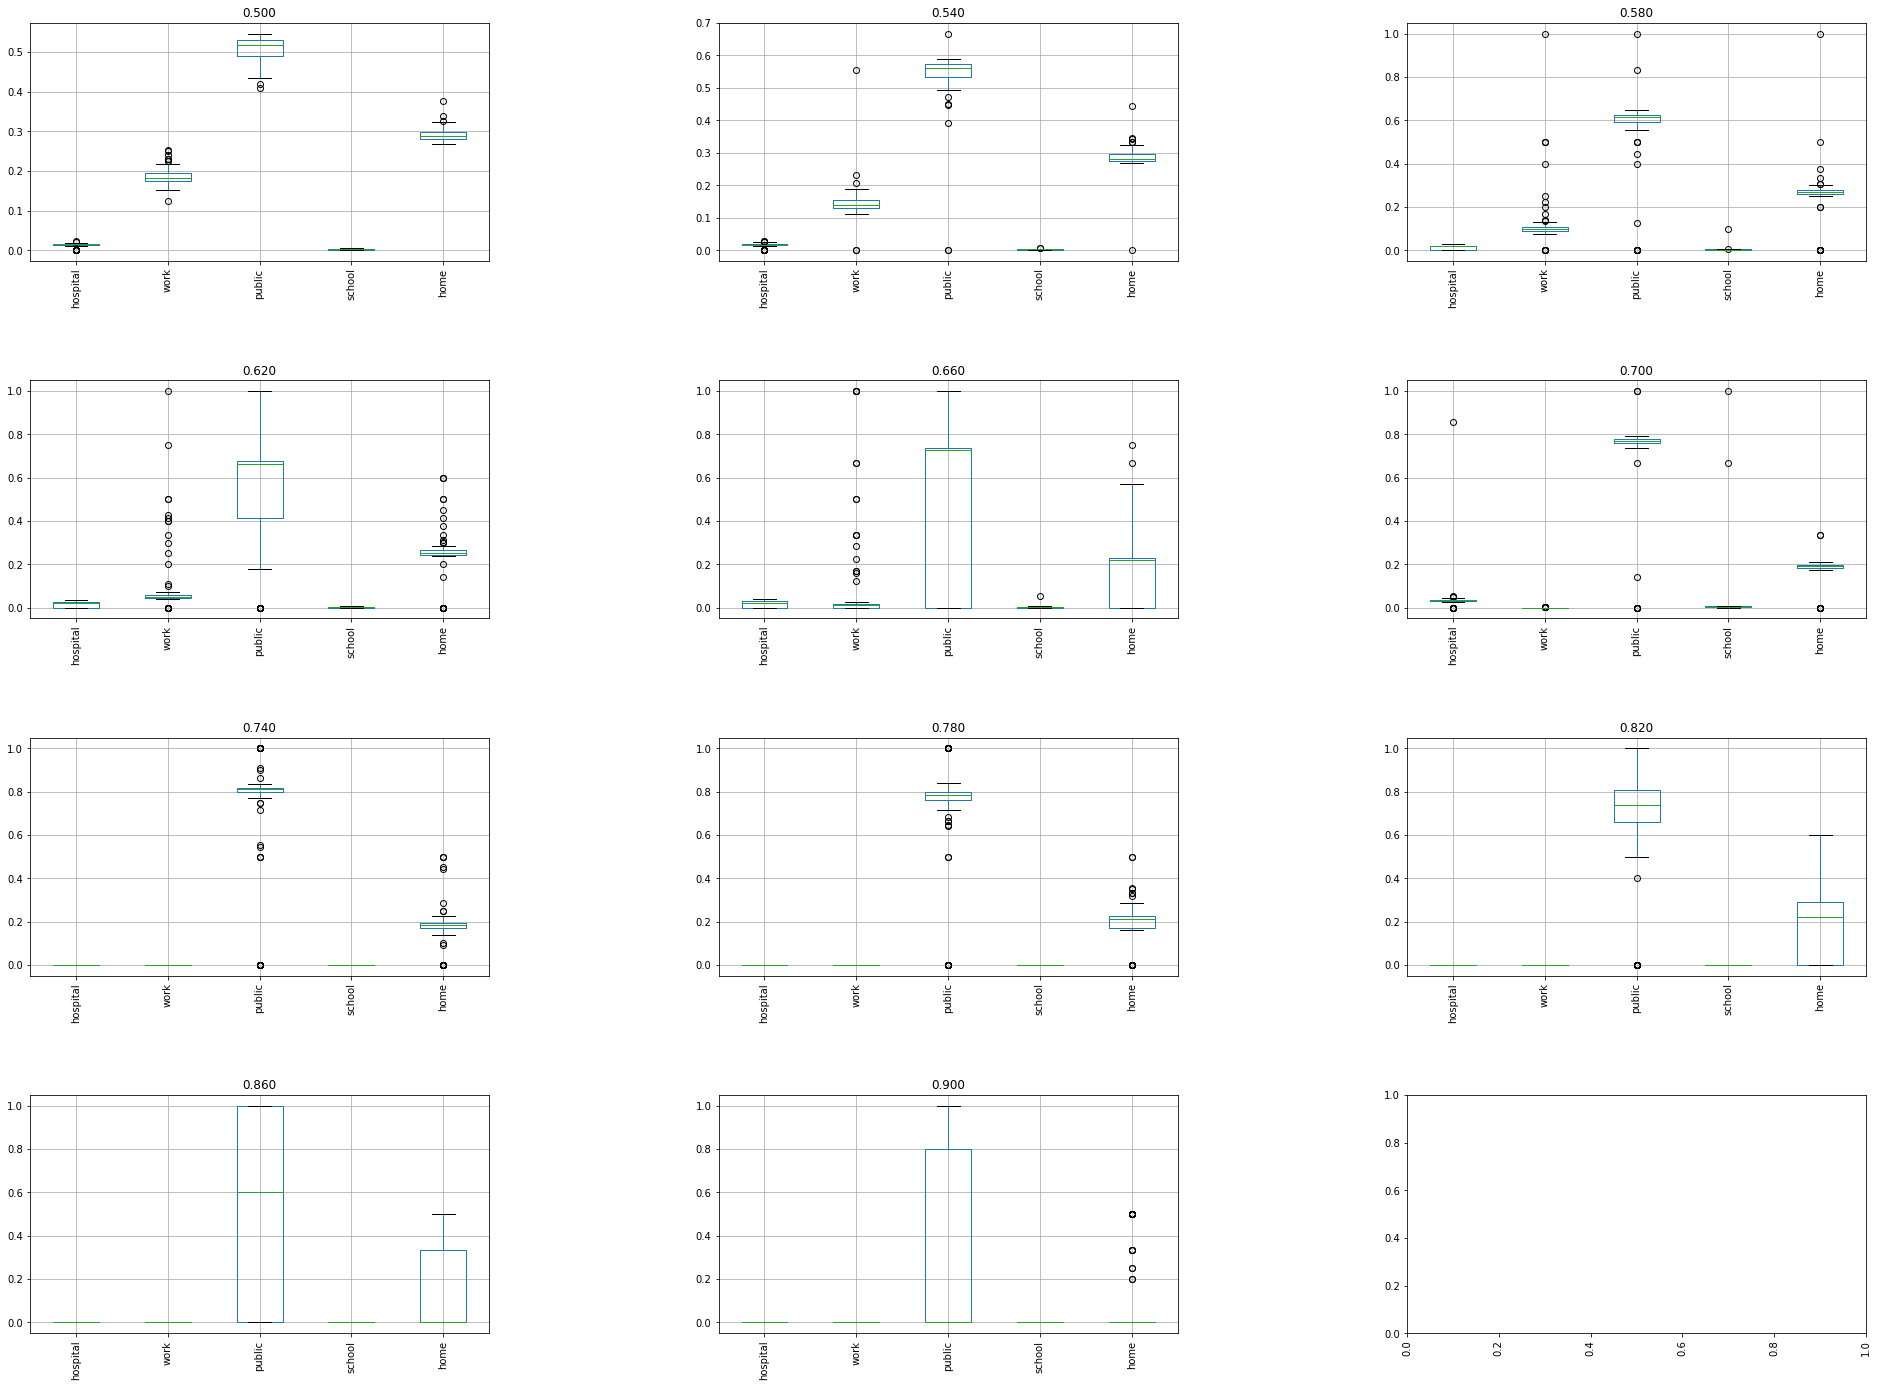

In [199]:
group_folder = 'recover_ordered1_scan_0.5_0.9'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_ordered1_scan_0.5_0.9_old

IndexError: list index out of range

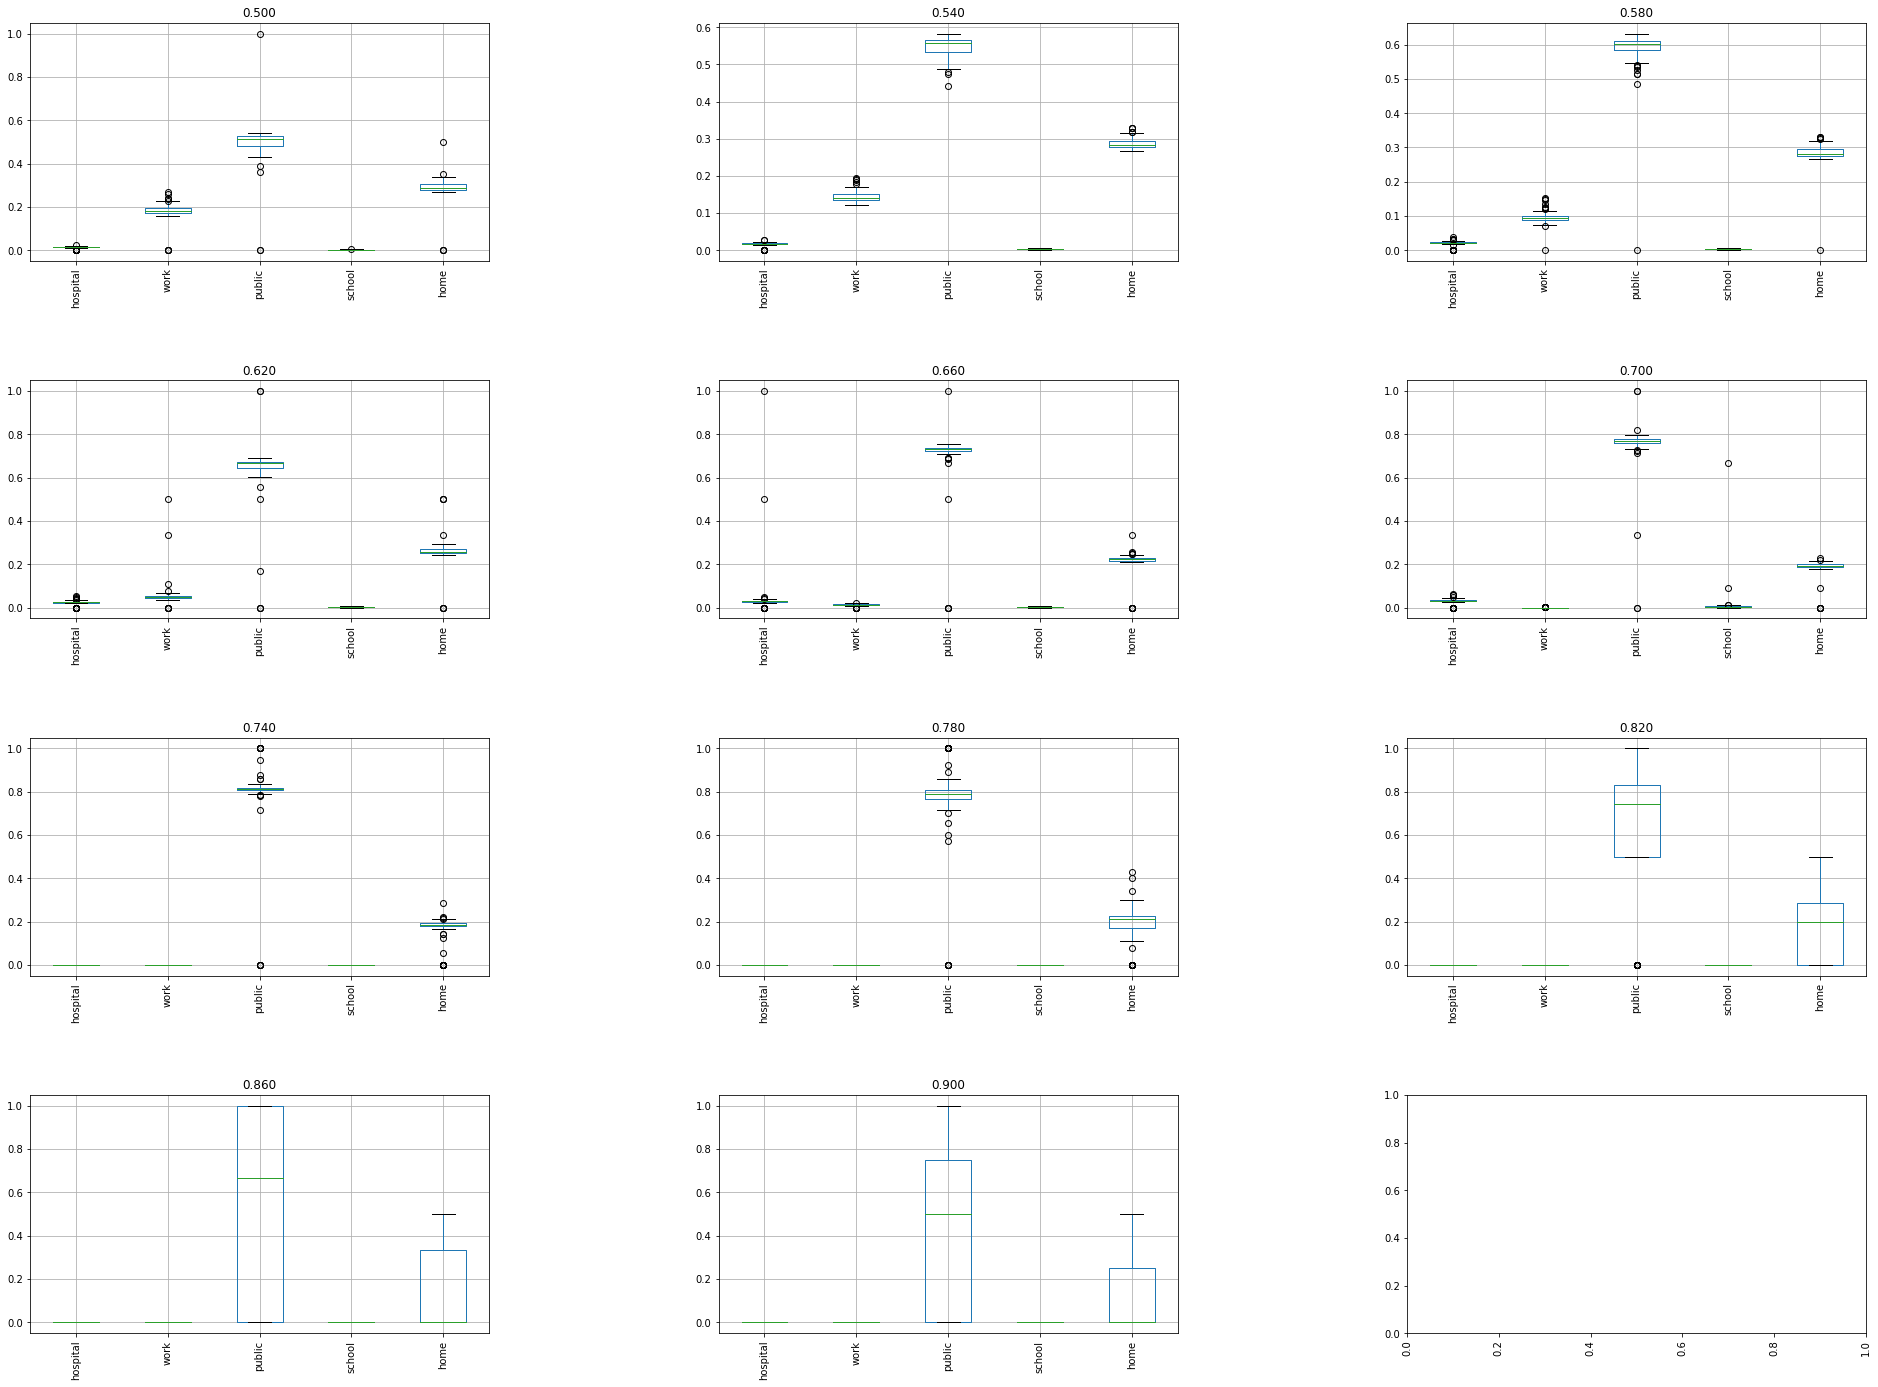

In [203]:
group_folder = 'recover_ordered1_scan_0.5_0.9_old'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,13,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_random_scan_0.5_0.9

IndexError: list index out of range

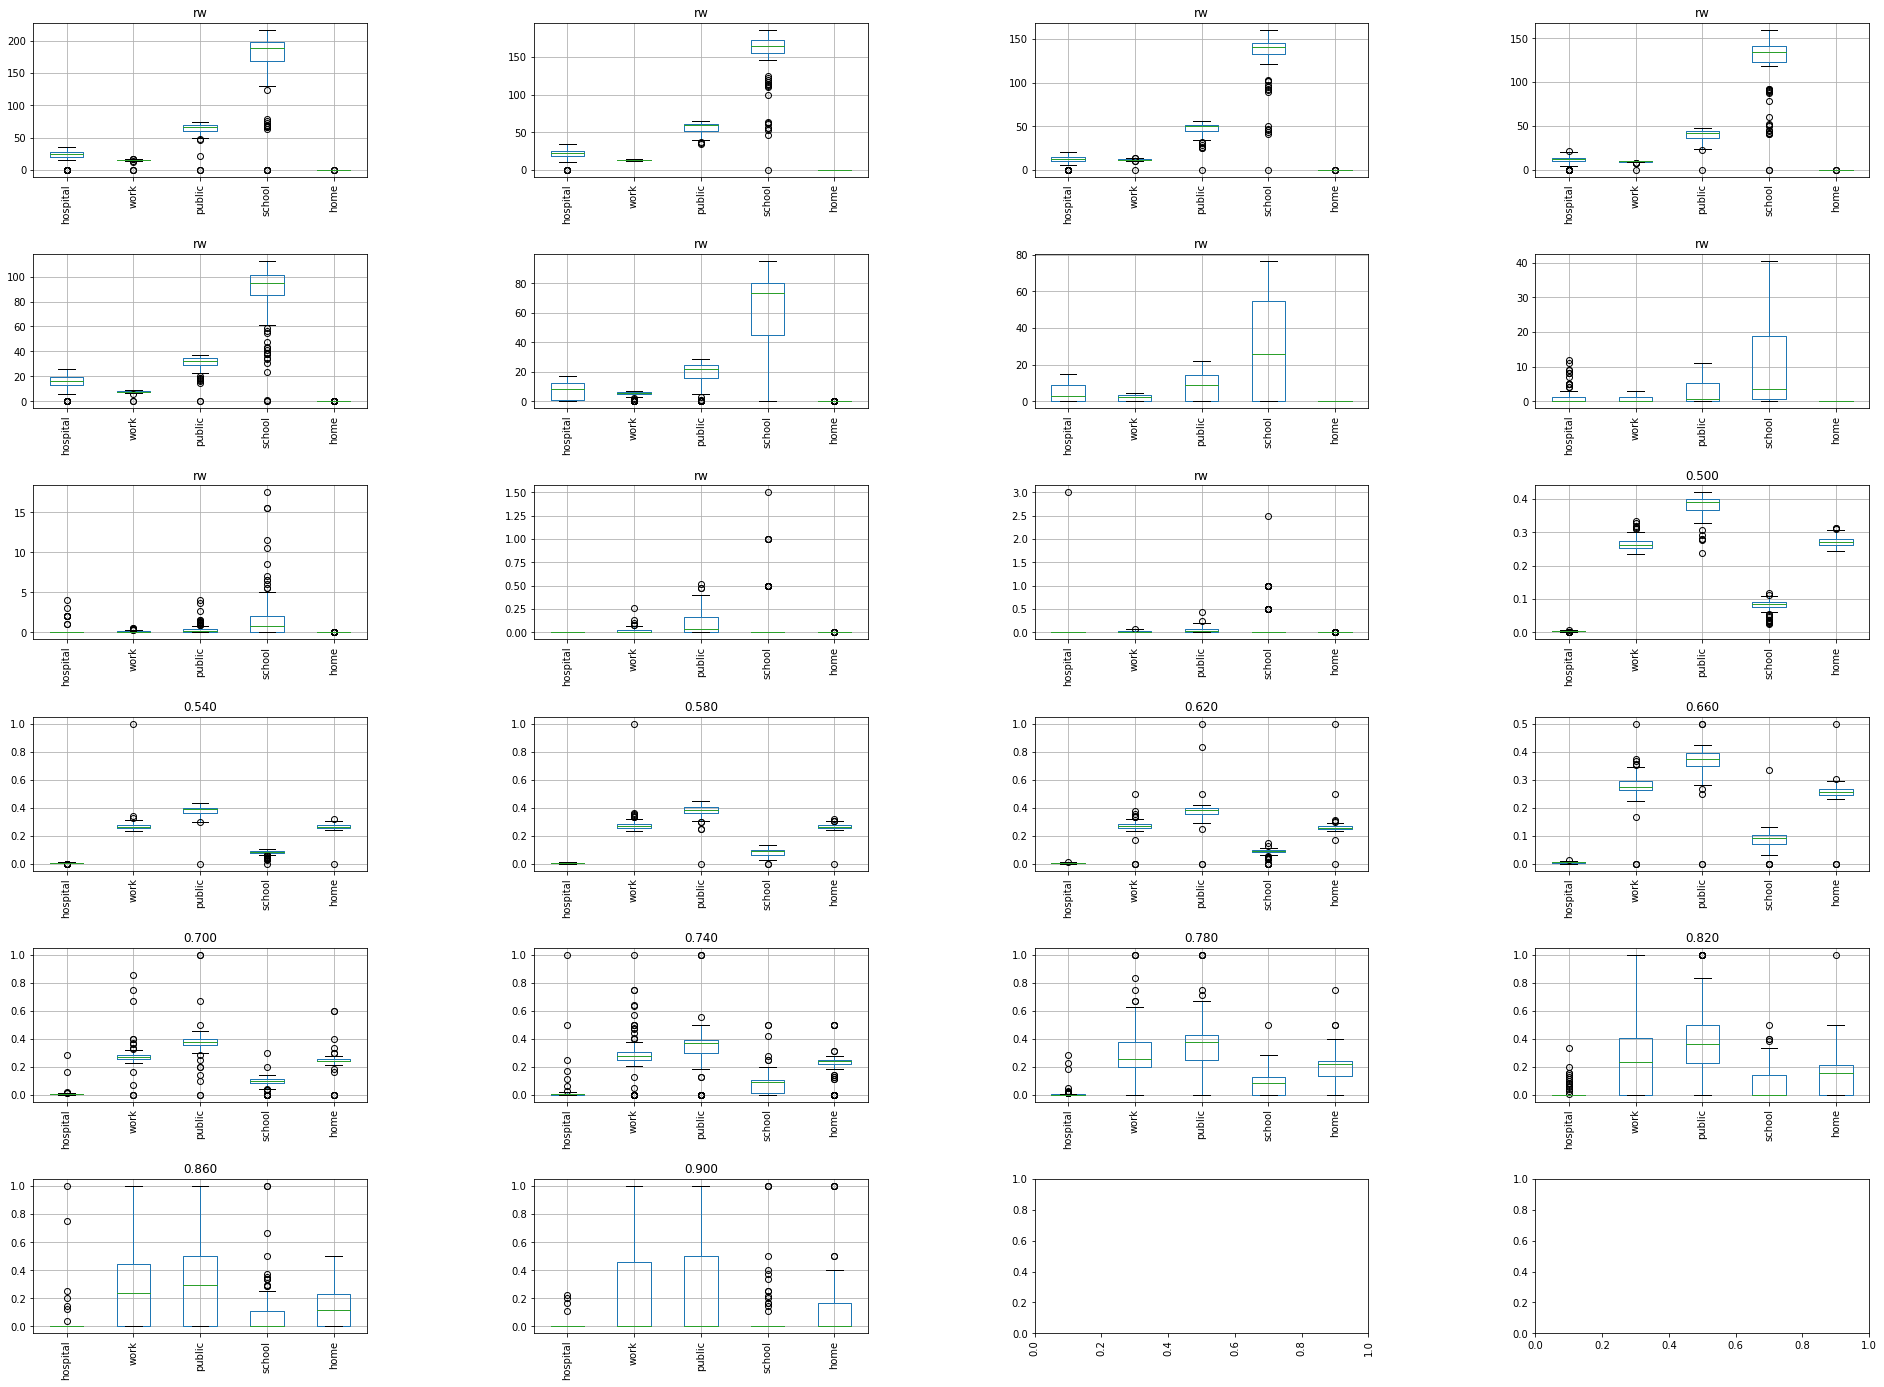

In [212]:
group_folder = 'recover_random_scan_0.5_0.9'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(6,4,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_random_scan_0.5_0.9_old

IndexError: list index out of range

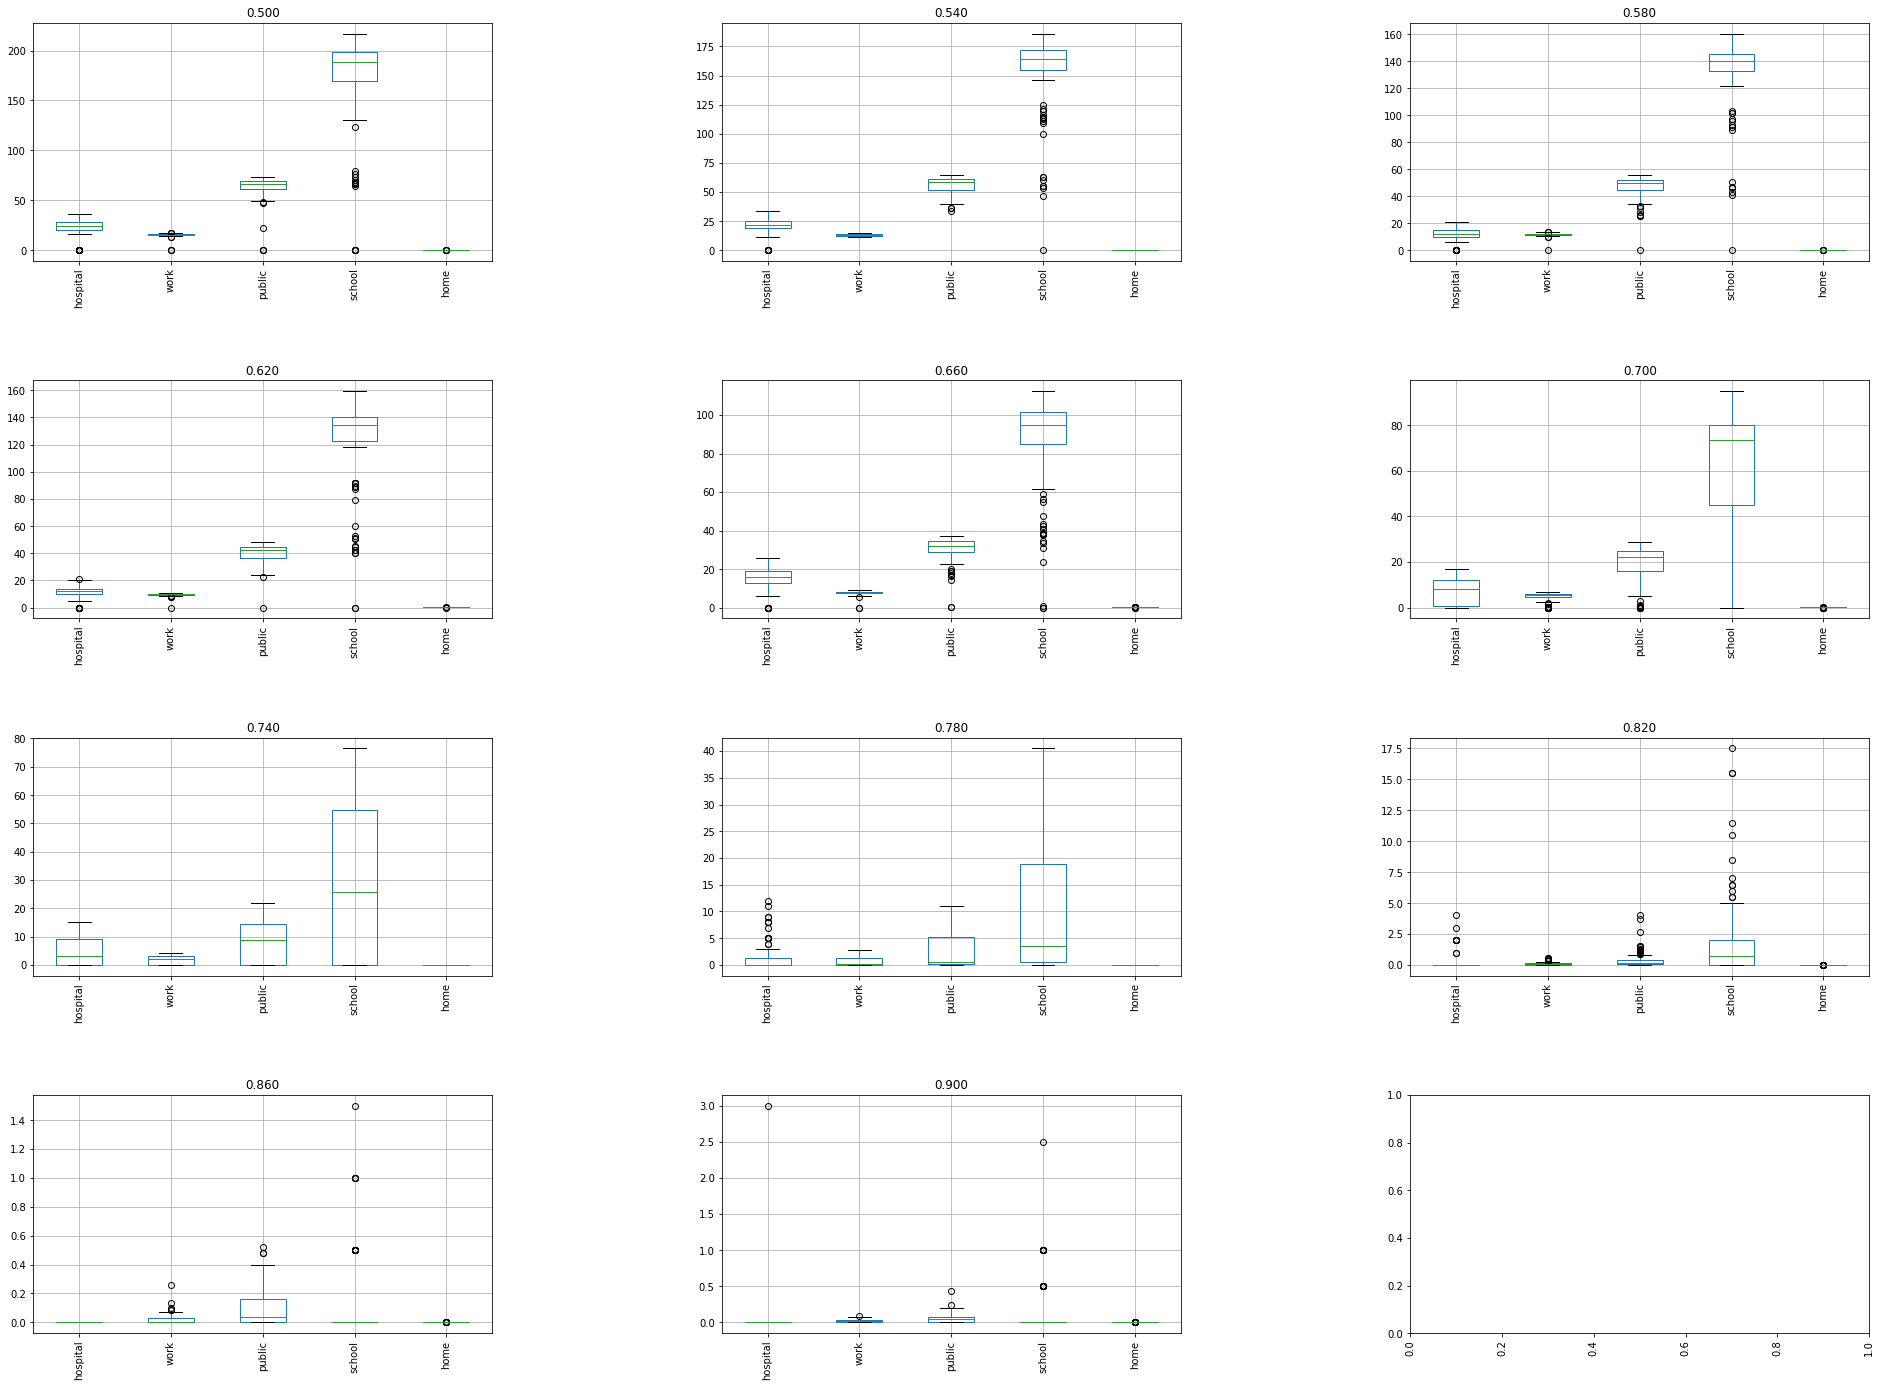

In [214]:
group_folder = 'recover_random_scan_0.5_0.9_old'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,11,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_random_scan_0_1

IndexError: list index out of range

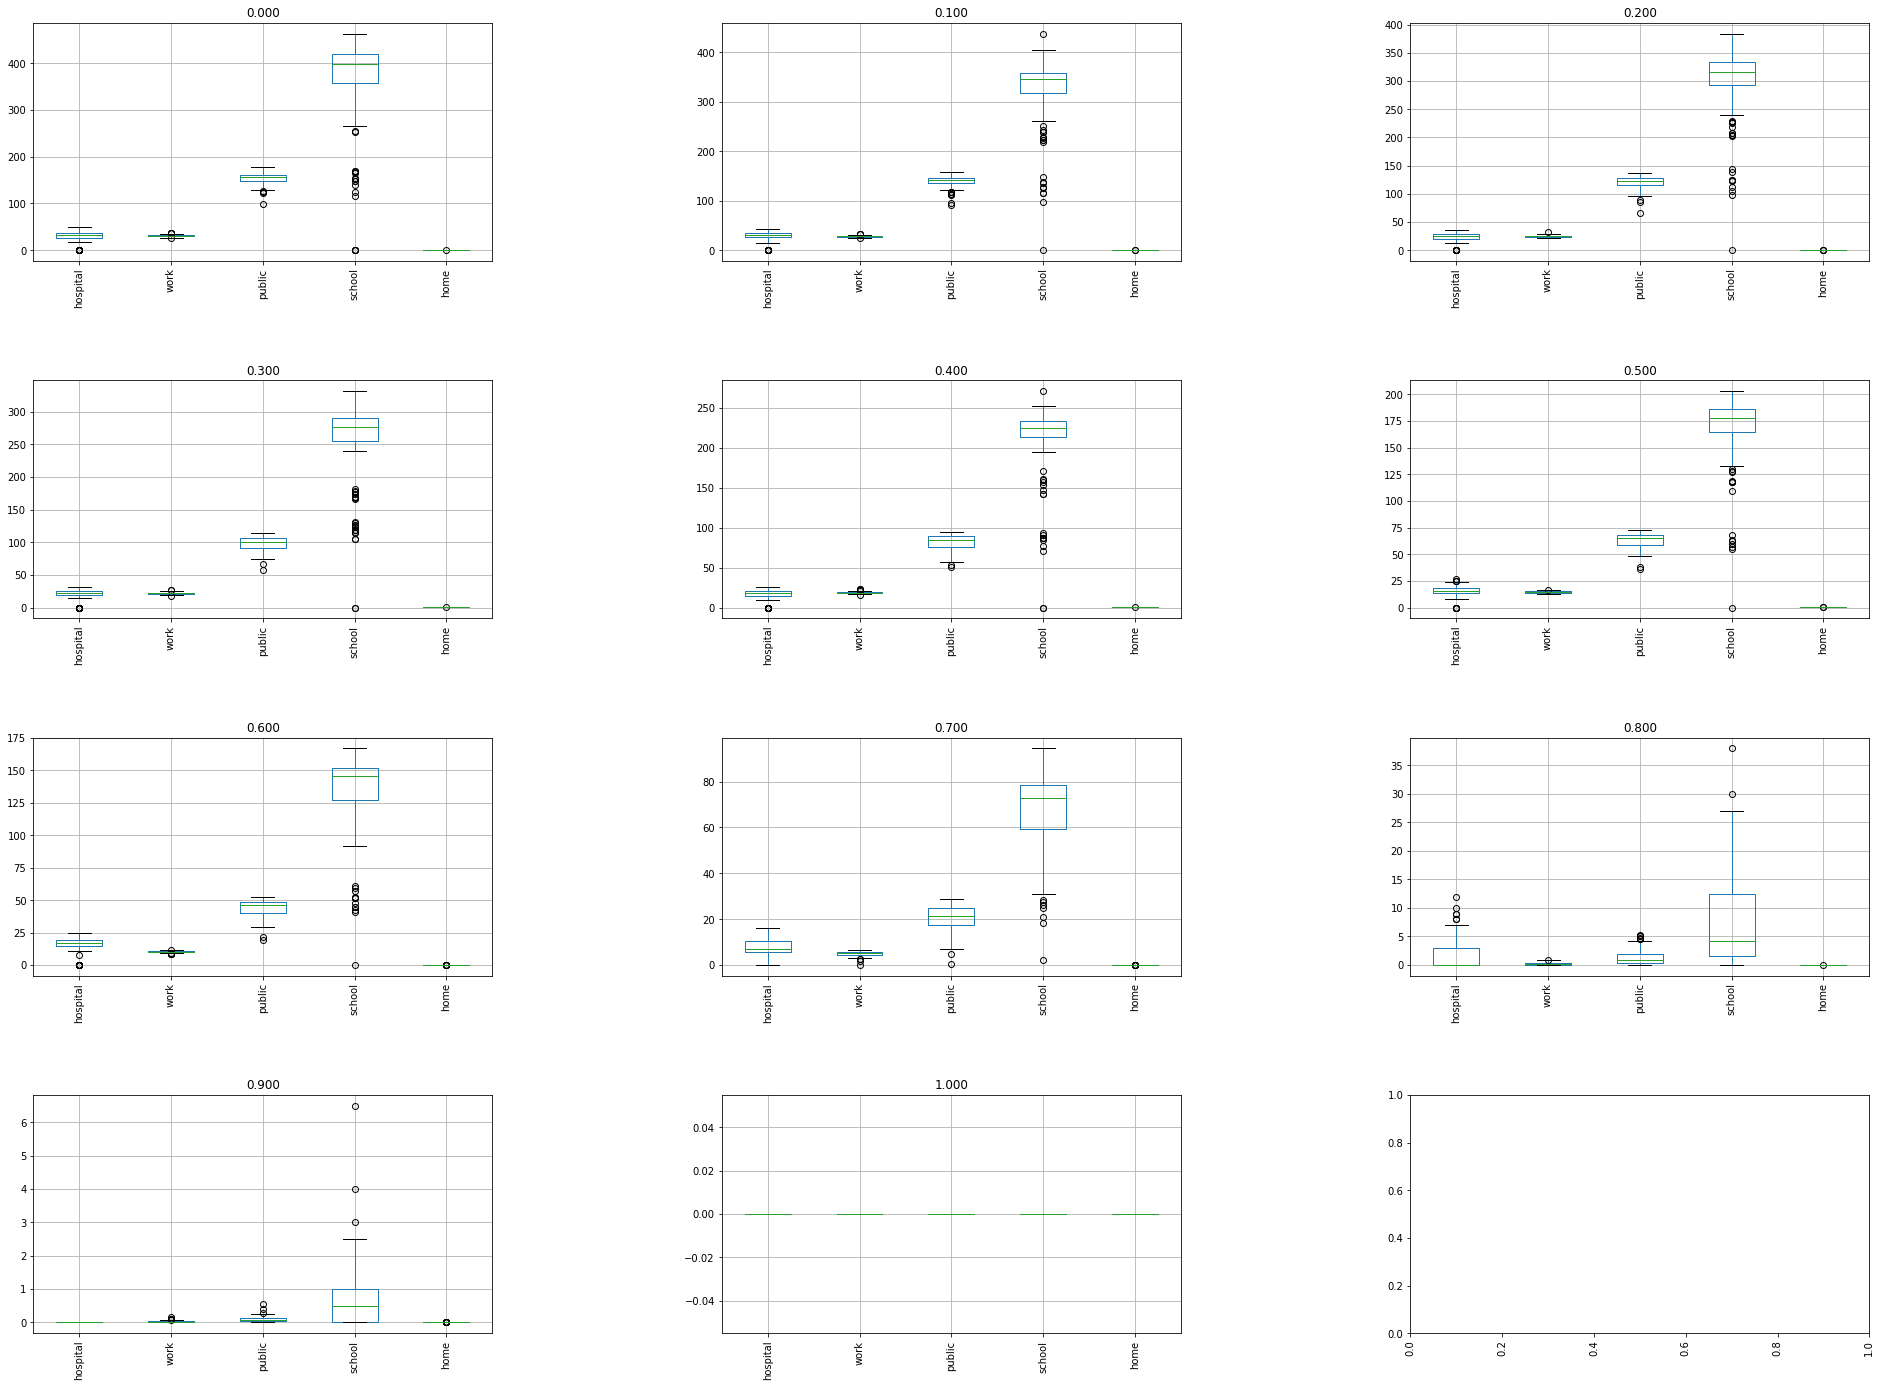

In [215]:
group_folder = 'recover_random_scan_0_1'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(30,26))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,11,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# recover_schedule_type

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/recover_schedule_type.png


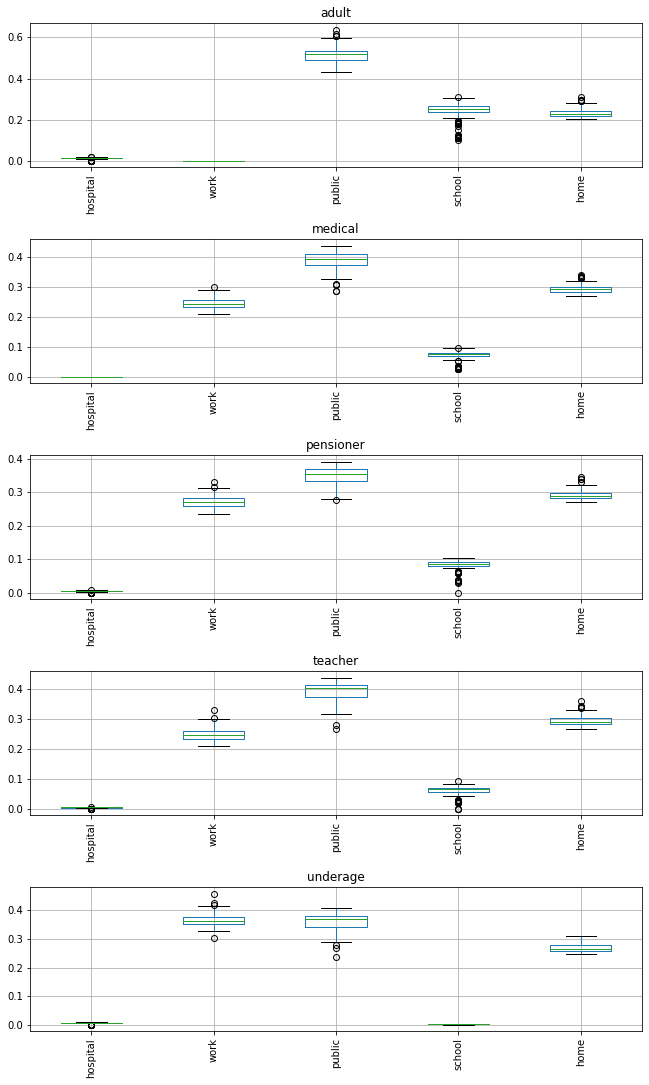

In [230]:
group_folder = 'recover_schedule_type'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(5,1,figsize=(10,20))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,4,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# reopen_all_scan_500_1500

IndexError: list index out of range

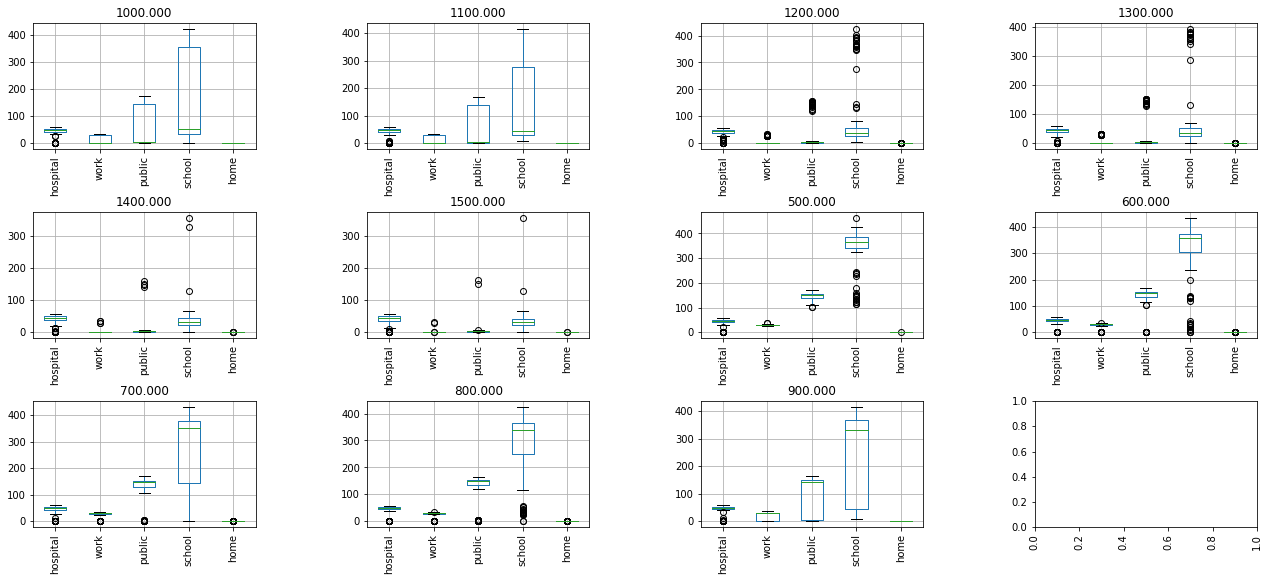

In [235]:
group_folder = 'reopen_all_scan_500_1500'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(3,4,figsize=(20,10))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,13,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# reopen_all_scan_672_1344

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/reopen_all_scan_672_1344.png


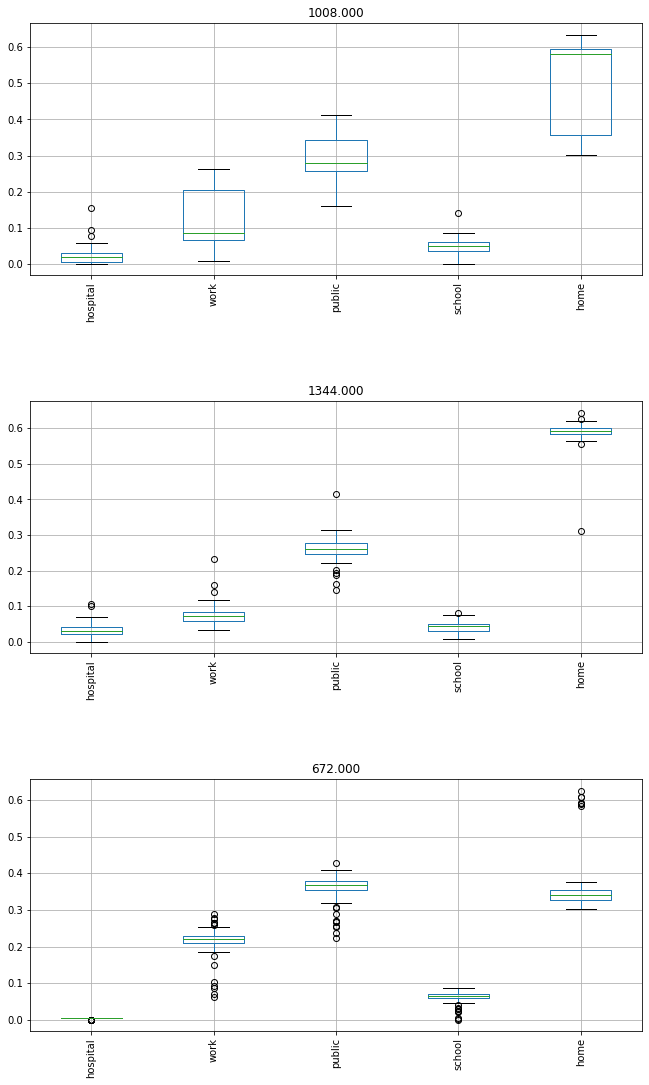

In [241]:
group_folder = 'reopen_all_scan_672_1344'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(3,1,figsize=(10,20))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,16,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# reopen_public_scan_500_1500

IndexError: list index out of range

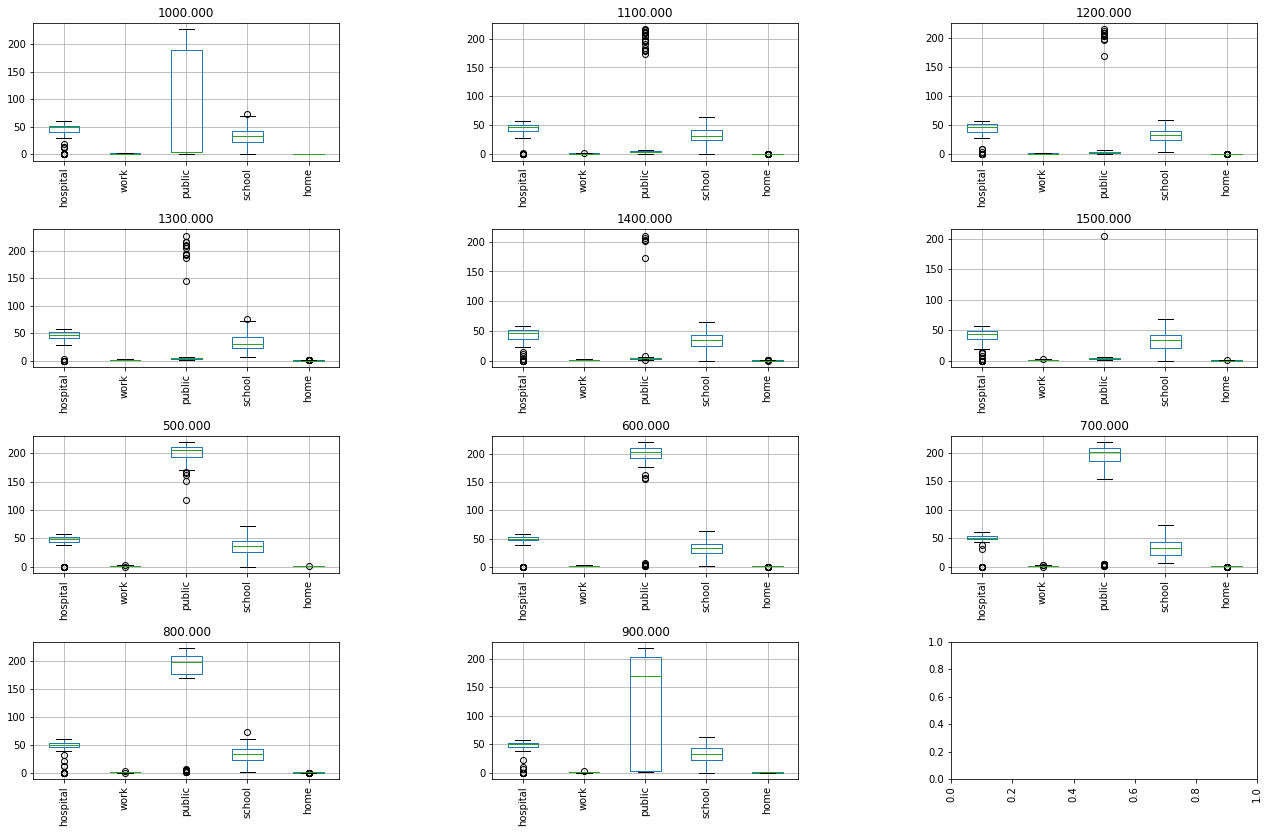

In [247]:
group_folder = 'reopen_public_scan_500_1500'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(20,15))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,13,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# reopen_school_scan_500_1500

IndexError: list index out of range

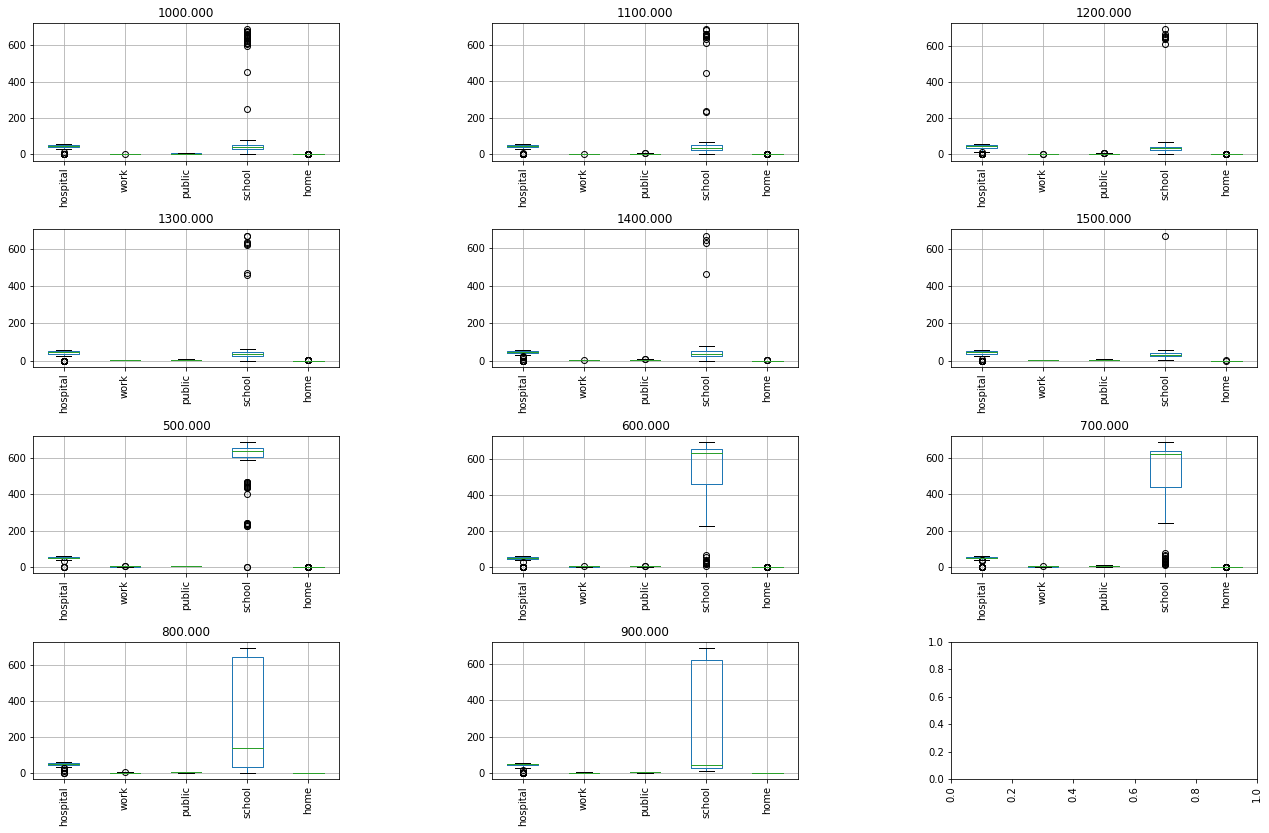

In [248]:
group_folder = 'reopen_school_scan_500_1500'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(20,15))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,13,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

# reopen_work_scan_500_1500

IndexError: list index out of range

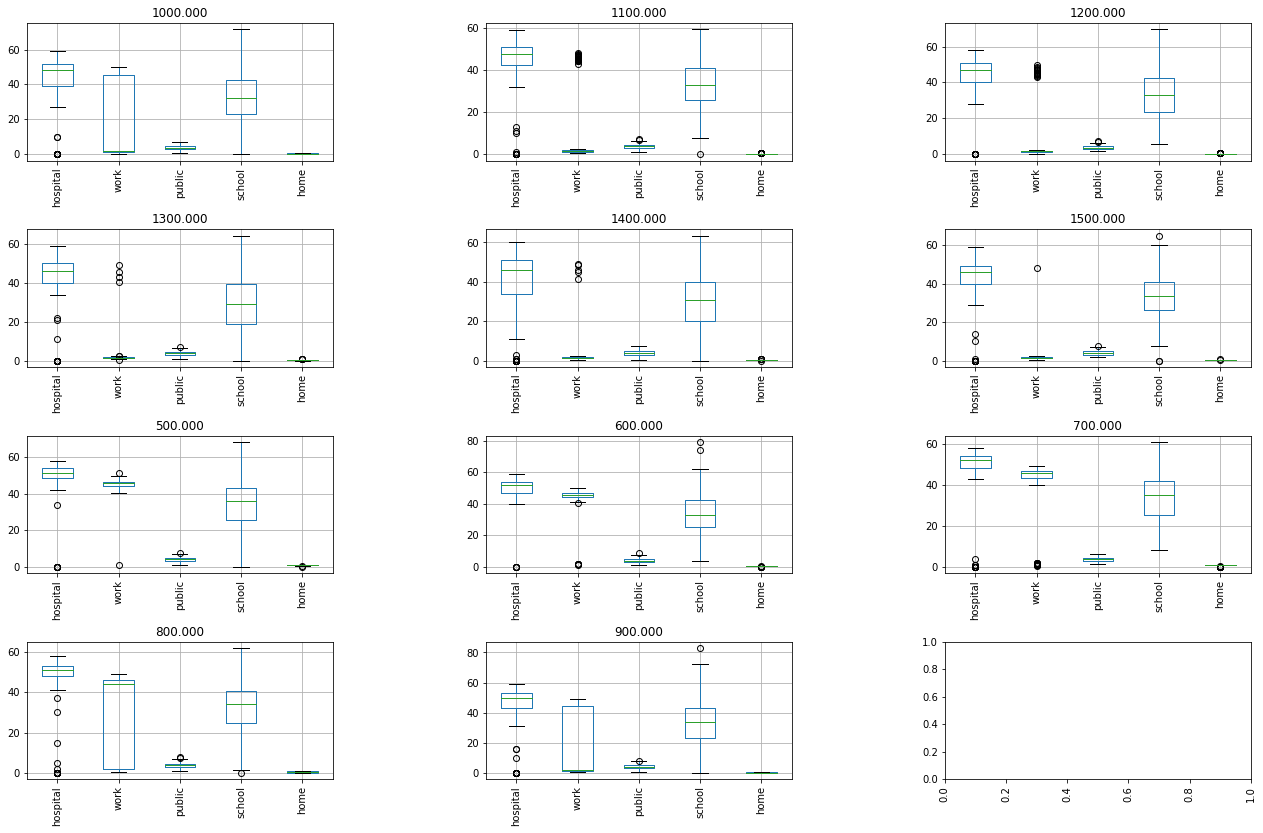

In [249]:
group_folder = 'reopen_work_scan_500_1500'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(4,3,figsize=(20,15))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,13,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')

/home/rafael/Documents/PhD/Academia/corona_else/Output_Rafael/timecourses_for_network.png


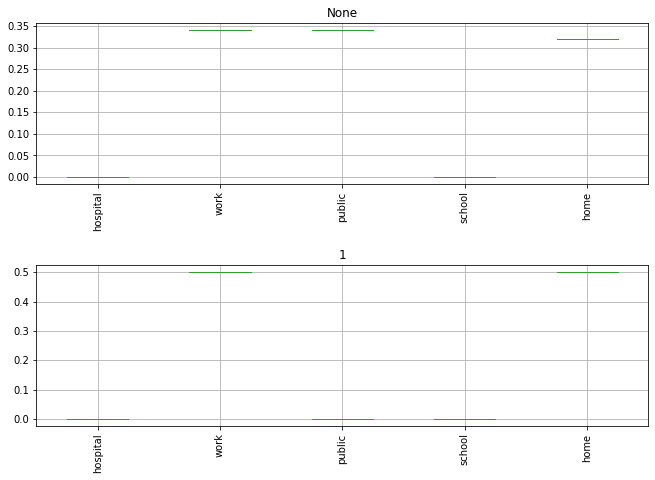

In [252]:
group_folder = 'timecourses_for_network'
locations_to_plot = ["hospital","work","public","school", "home" ]
scenarios_files_dict[group_folder].sort() 
fig, axes = plt.subplots(2,1,figsize=(10,8))
plt.subplots_adjust(left=.05, bottom=.2, right=.9, top=.9, wspace=.5, hspace=.5)

for j, i in enumerate(scenarios_files_dict[group_folder]):
    #print(j,i)
    df = pd.read_csv(i)
    df[locations_to_plot].boxplot(ax=axes.flat[j])#, labels = subplot_name(group_folder,14,j))
    

for i,ax in enumerate(fig.axes):
    plt.sca(ax)
    plt.xticks(rotation=90)
    plt.title(subplot_name(group_folder,12,i))


fig.savefig(output_folder + group_folder + '.png')
print(output_folder + group_folder + '.png')